In [ ]:
# Import necessary libraries
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt

In [40]:
# Load the data
dl_df = pd.read_csv('DL_Secondary_Defense.csv')
metric = 'Current_PFF'  # Metric to predict

In [41]:
print(dl_df.columns)

Index(['Team', 'Year', 'Position', 'Value_cap_space', 'Value_draft_data',
       'Current_AV', 'Current_PFF', 'Total DVOA', 'win-loss-pct', 'Net EPA',
       ...
       'Previous_snap_counts_pass_rush', 'Previous_snap_counts_run_defense',
       'Previous_snap_counts_slot', 'Previous_stops', 'Previous_tackles',
       'Previous_tackles_for_loss', 'Previous_targets',
       'Previous_total_pressures', 'Previous_touchdowns', 'Previous_yards'],
      dtype='object', length=108)


In [42]:
# Sort data by Team and Year
dl_df = dl_df.sort_values(by=['Team', 'Year'])
print(dl_df.head())

      Team  Year Position  Value_cap_space  Value_draft_data  Current_AV  \
17   49ers  2019       DL        15.903294       1400.696696        53.0   
50   49ers  2020       DL         6.755802       1402.398565        39.0   
70   49ers  2021       DL        18.465753        741.861341        34.0   
123  49ers  2022       DL        19.298751        752.319057        51.0   
12   Bears  2019       DL        12.348565         83.494332        29.0   

     Current_PFF Total DVOA  win-loss-pct  Net EPA  ...  \
17     76.896506     27.90%      0.812500    0.216  ...   
50     60.632050      5.40%      0.375000    0.025  ...   
70     70.883348     19.50%      0.588235    0.081  ...   
123    64.292499     27.60%      0.764706    0.196  ...   
12     68.035738     -2.10%      0.500000   -0.032  ...   

     Previous_snap_counts_pass_rush  Previous_snap_counts_run_defense  \
17                       327.077444                        217.831236   
50                       353.500695       

In [43]:
team_data = dl_df.groupby('Team')

In [44]:
import numpy as np

sequences = []
targets = []

# Iterate over each team and its respective data
for team, group in team_data:
    # Ensure the team has at least 4 years of data
    if len(group) >= 4:
        print(f"Processing team: {team}, data length: {len(group)}")  # Debugging: check length of data for each team
        
        # Iterate through the data to create sequences for 3 years
        for i in range(len(group) - 3):
            # Select the relevant columns for the sequence
            sequence = group.iloc[i:i+3][[
                                            'Previous_stops',
                                            'Previous_total_pressures',
                                            'Previous_hurries',
                                            'Previous_snap_counts_pass_rush',
                                            'Previous_hits',
                                            'Previous_sacks',
                                            'Previous_batted_passes'  # Adjusted for relevance if applicable.
                                        ]]
            
            # The target is the next year's Current_PFF
            target = group.iloc[i+3]['Current_PFF']  
            
            sequences.append(sequence.values)  # Add the sequence to the list
            targets.append(target)  # Add the target to the list

# Convert lists to numpy arrays
X = np.array(sequences)
y = np.array(targets)



print(f"Total sequences generated: {len(sequences)}")
print(f"X shape: {X.shape}, y shape: {y.shape}")

Processing team: 49ers, data length: 4
Processing team: Bears, data length: 4
Processing team: Bengals, data length: 4
Processing team: Bills, data length: 4
Processing team: Broncos, data length: 4
Processing team: Browns, data length: 4
Processing team: Buccaneers, data length: 4
Processing team: Cardinals, data length: 4
Processing team: Chargers, data length: 4
Processing team: Chiefs, data length: 4
Processing team: Colts, data length: 4
Processing team: Commanders, data length: 4
Processing team: Cowboys, data length: 4
Processing team: Dolphins, data length: 4
Processing team: Eagles, data length: 4
Processing team: Falcons, data length: 4
Processing team: Giants, data length: 4
Processing team: Jaguars, data length: 4
Processing team: Jets, data length: 4
Processing team: Lions, data length: 4
Processing team: Packers, data length: 4
Processing team: Panthers, data length: 4
Processing team: Patriots, data length: 4
Processing team: Raiders, data length: 4
Processing team: Rams

In [45]:
# Check shape before reshaping
print(X)
print(X.shape)

# Reshape X to (samples, timesteps, features)
X = X.reshape(X.shape[0], 3, -1)  # 3 years per sequence, features will be inferred

print(X.shape)  # Should now be (samples, 3, features)
print(X)

scaler = StandardScaler()
X = scaler.fit_transform(X.reshape(-1, X.shape[-1])).reshape(X.shape)

[[[2.06999748e+01 3.12759750e+01 1.97787607e+01 3.27077444e+02
   6.30729967e+00 5.18991458e+00 6.87831813e-01]
  [2.28407019e+01 4.07657105e+01 2.77417955e+01 3.53500695e+02
   6.75005407e+00 6.27386098e+00 6.98354247e-01]
  [1.69228866e+01 2.38512874e+01 1.68669428e+01 2.94940888e+02
   3.75668980e+00 3.22765479e+00 6.36931407e-01]]

 [[2.40613374e+01 3.60867321e+01 2.49707883e+01 3.60143628e+02
   5.55716802e+00 5.55877580e+00 1.17902792e+00]
  [2.10895520e+01 2.95975379e+01 2.08805482e+01 3.22071112e+02
   5.07574344e+00 3.64124631e+00 1.37154235e+00]
  [1.98827630e+01 3.14110181e+01 2.11974187e+01 3.16179514e+02
   5.83485923e+00 4.37874012e+00 9.83329843e-01]]

 [[1.95213773e+01 3.18401065e+01 2.11133586e+01 3.32730717e+02
   6.12748300e+00 4.59926494e+00 1.62578342e+00]
  [2.46146194e+01 3.52052605e+01 2.38283181e+01 3.25716199e+02
   6.43643935e+00 4.94050308e+00 9.93360935e-01]
  [1.56823135e+01 2.06443607e+01 1.26744953e+01 2.53035036e+02
   6.22419470e+00 1.74567069e+00 1.14

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, SimpleRNN, MultiHeadAttention, LayerNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [47]:
# Define the input layer
inputs = Input(shape=(3, 7))  # 3 time steps, 8 features

# Add a Dense layer before the attention to create more variability in the input
dense_input = Dense(16, activation='relu')(inputs)

# Add MultiHeadAttention layer
attention_output = MultiHeadAttention(num_heads=2, key_dim=8)(dense_input, dense_input)

# Add Layer Normalization for stability
attention_output = LayerNormalization()(attention_output)

# Add RNN layer to capture temporal dependencies
rnn_output = SimpleRNN(units=50, activation='relu')(attention_output)

# Add Dropout to prevent overfitting
rnn_output = Dropout(0.2)(rnn_output)

# Output layer for predicting Current PFF
output = Dense(1)(rnn_output)

# Define the model
model = Model(inputs=inputs, outputs=output)

In [48]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [49]:
# Early stopping callback to monitor validation loss
#early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

Epoch 1/5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3319.3176 - val_loss: 3361.4375
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3133.0081 - val_loss: 3135.8438
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2824.1528 - val_loss: 2874.5447
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2562.4495 - val_loss: 2564.6072
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2333.5735 - val_loss: 2211.0354


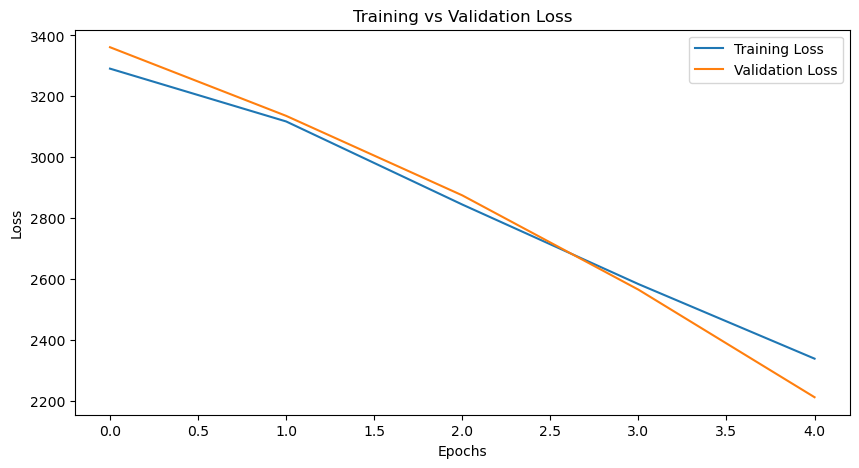

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
R² Score: -79.1855


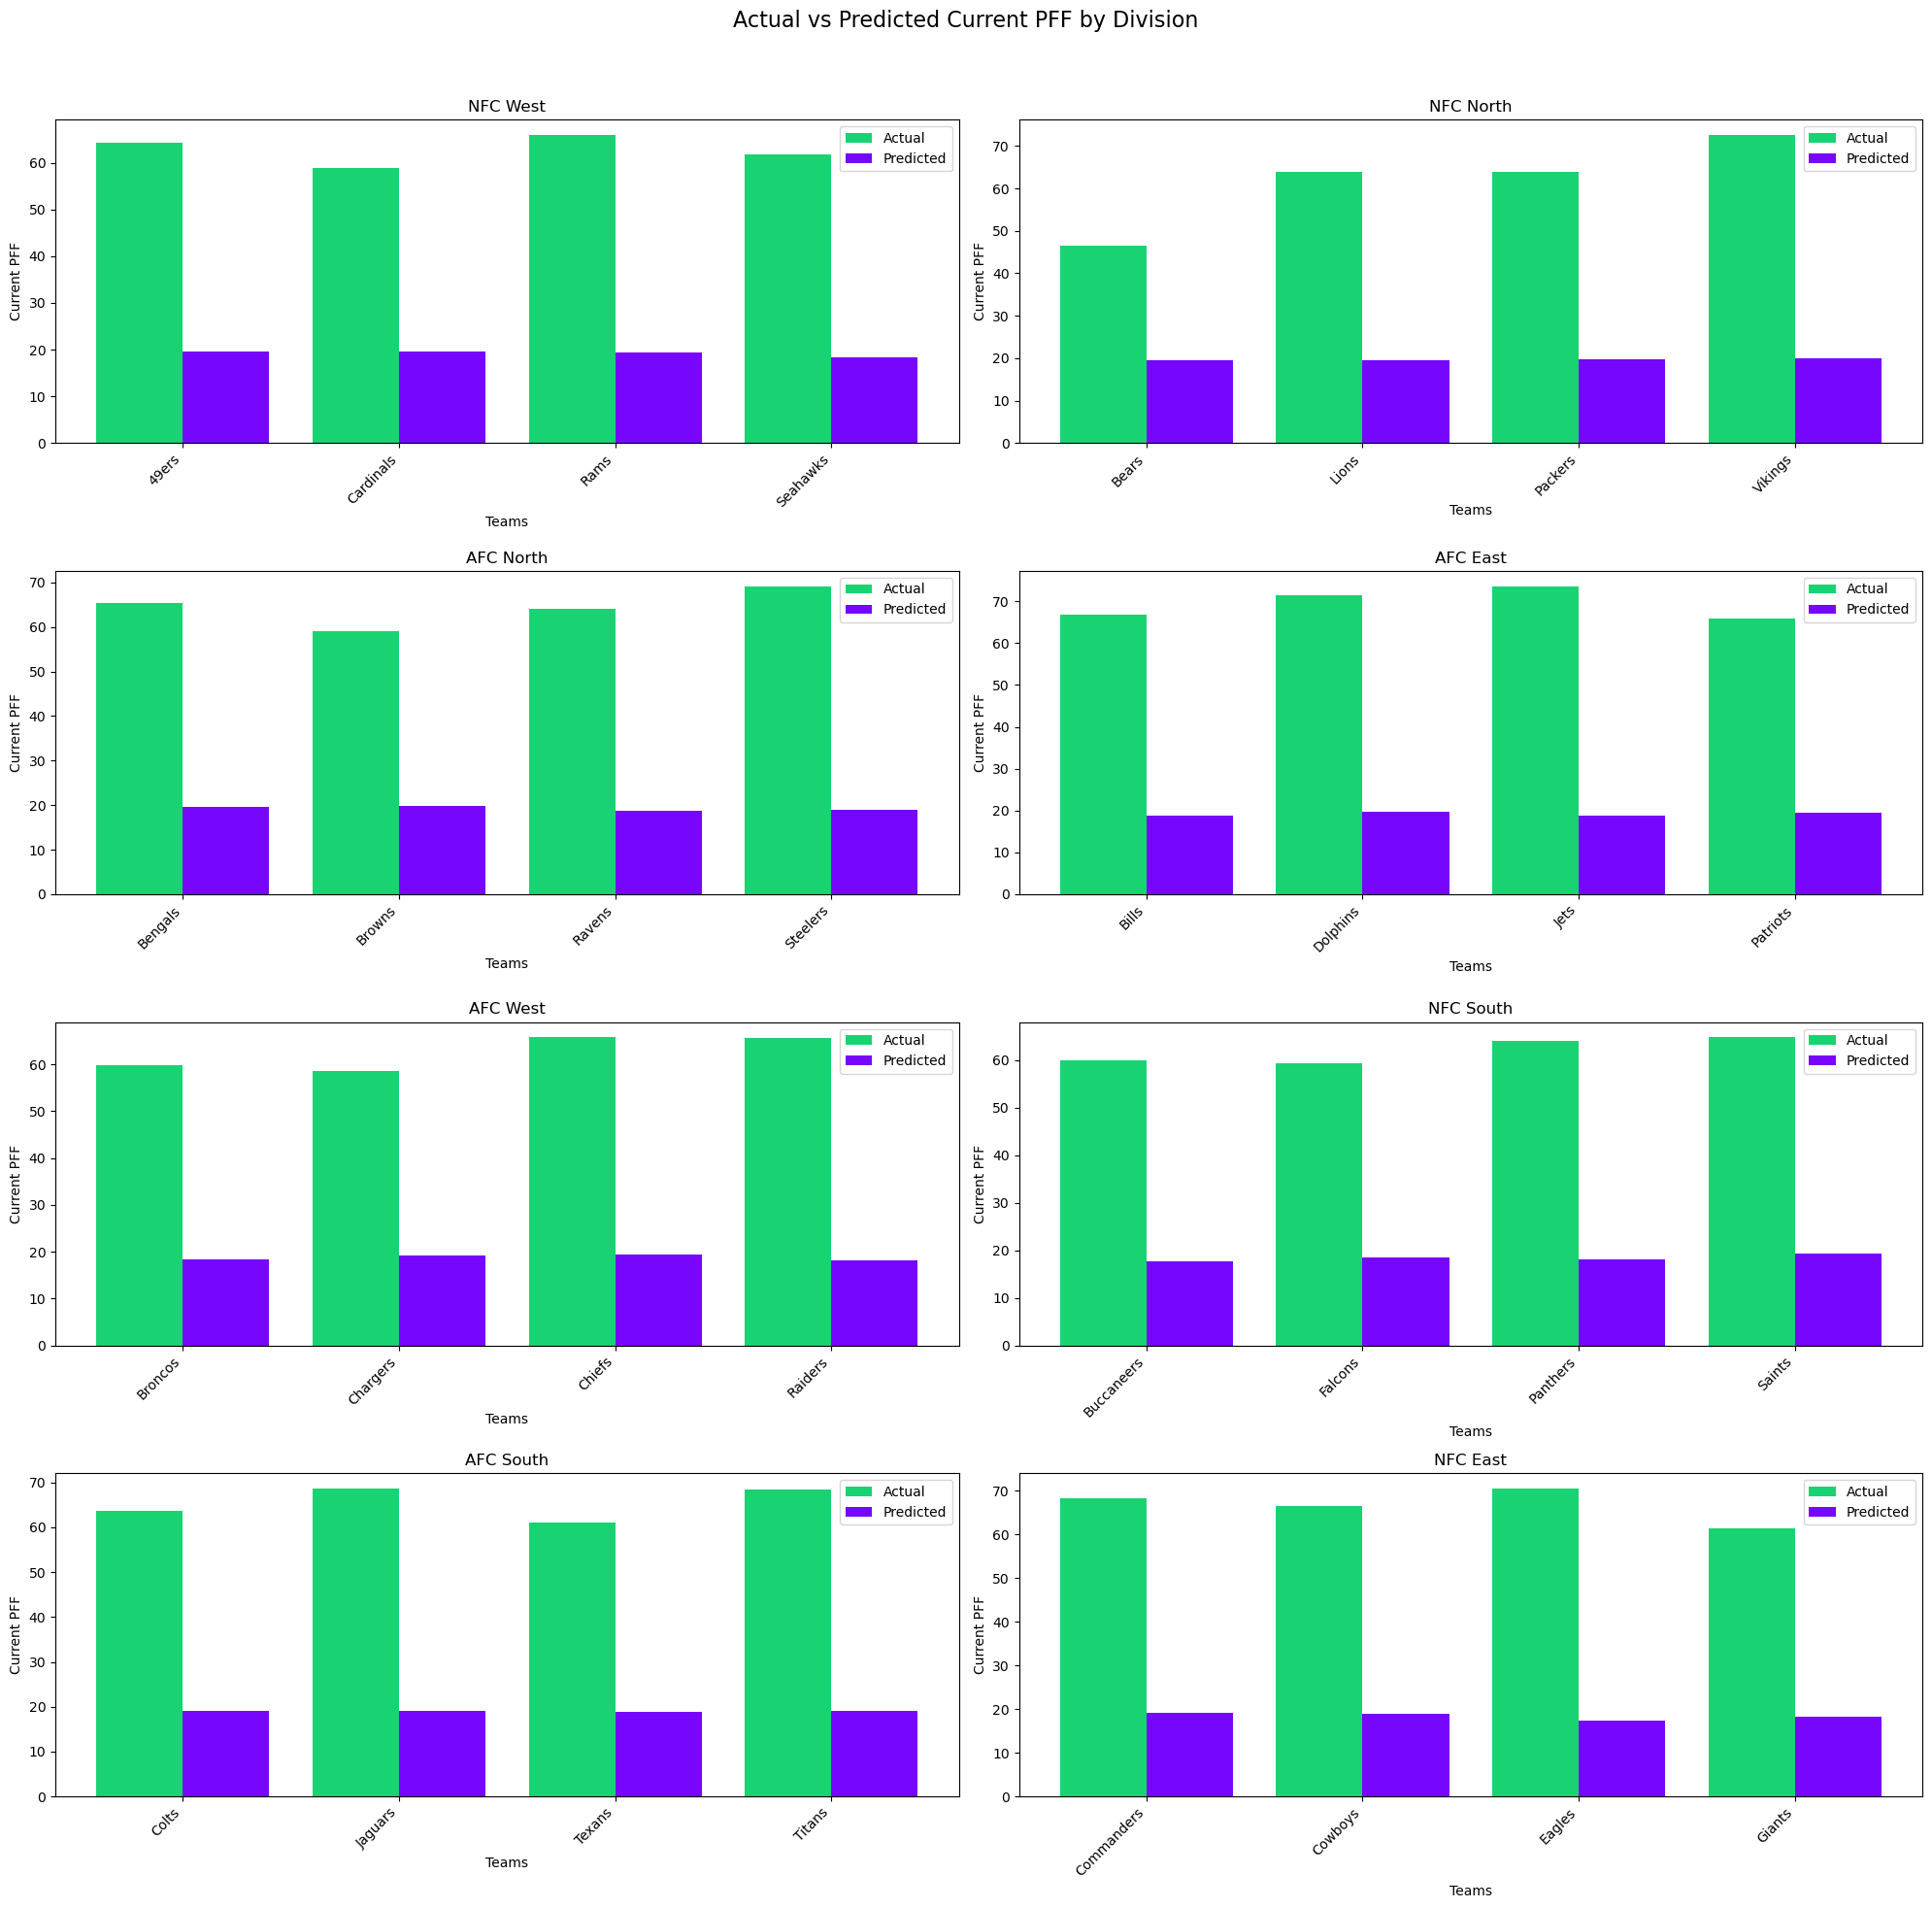

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1917.6486 - val_loss: 1816.0052
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1537.2438 - val_loss: 1389.2367
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1201.0524 - val_loss: 954.8860
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 977.6787 - val_loss: 550.6234
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 475.0756 - val_loss: 233.0643
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 258.3299 - val_loss: 51.8210
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 85.5072 - val_loss: 16.4515
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 116.9097 - val_loss: 51.7213
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 144.8193 - val_loss: 66.4206
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 173.7148 - val_loss: 33.7215


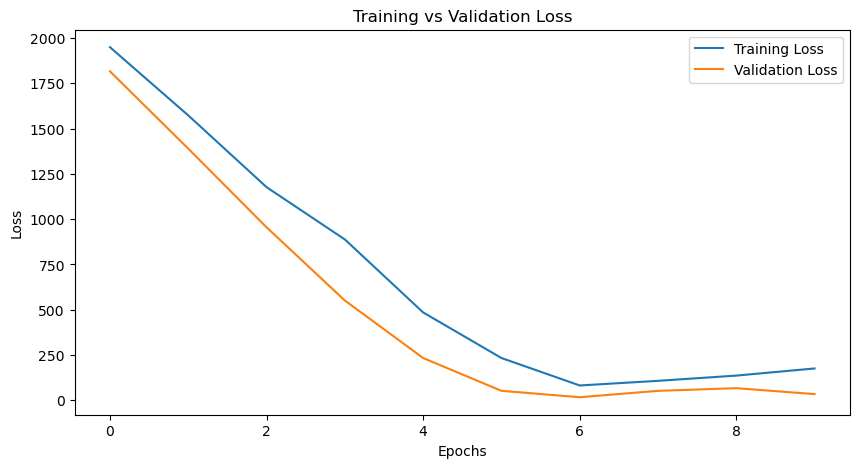

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
R² Score: -1.2365


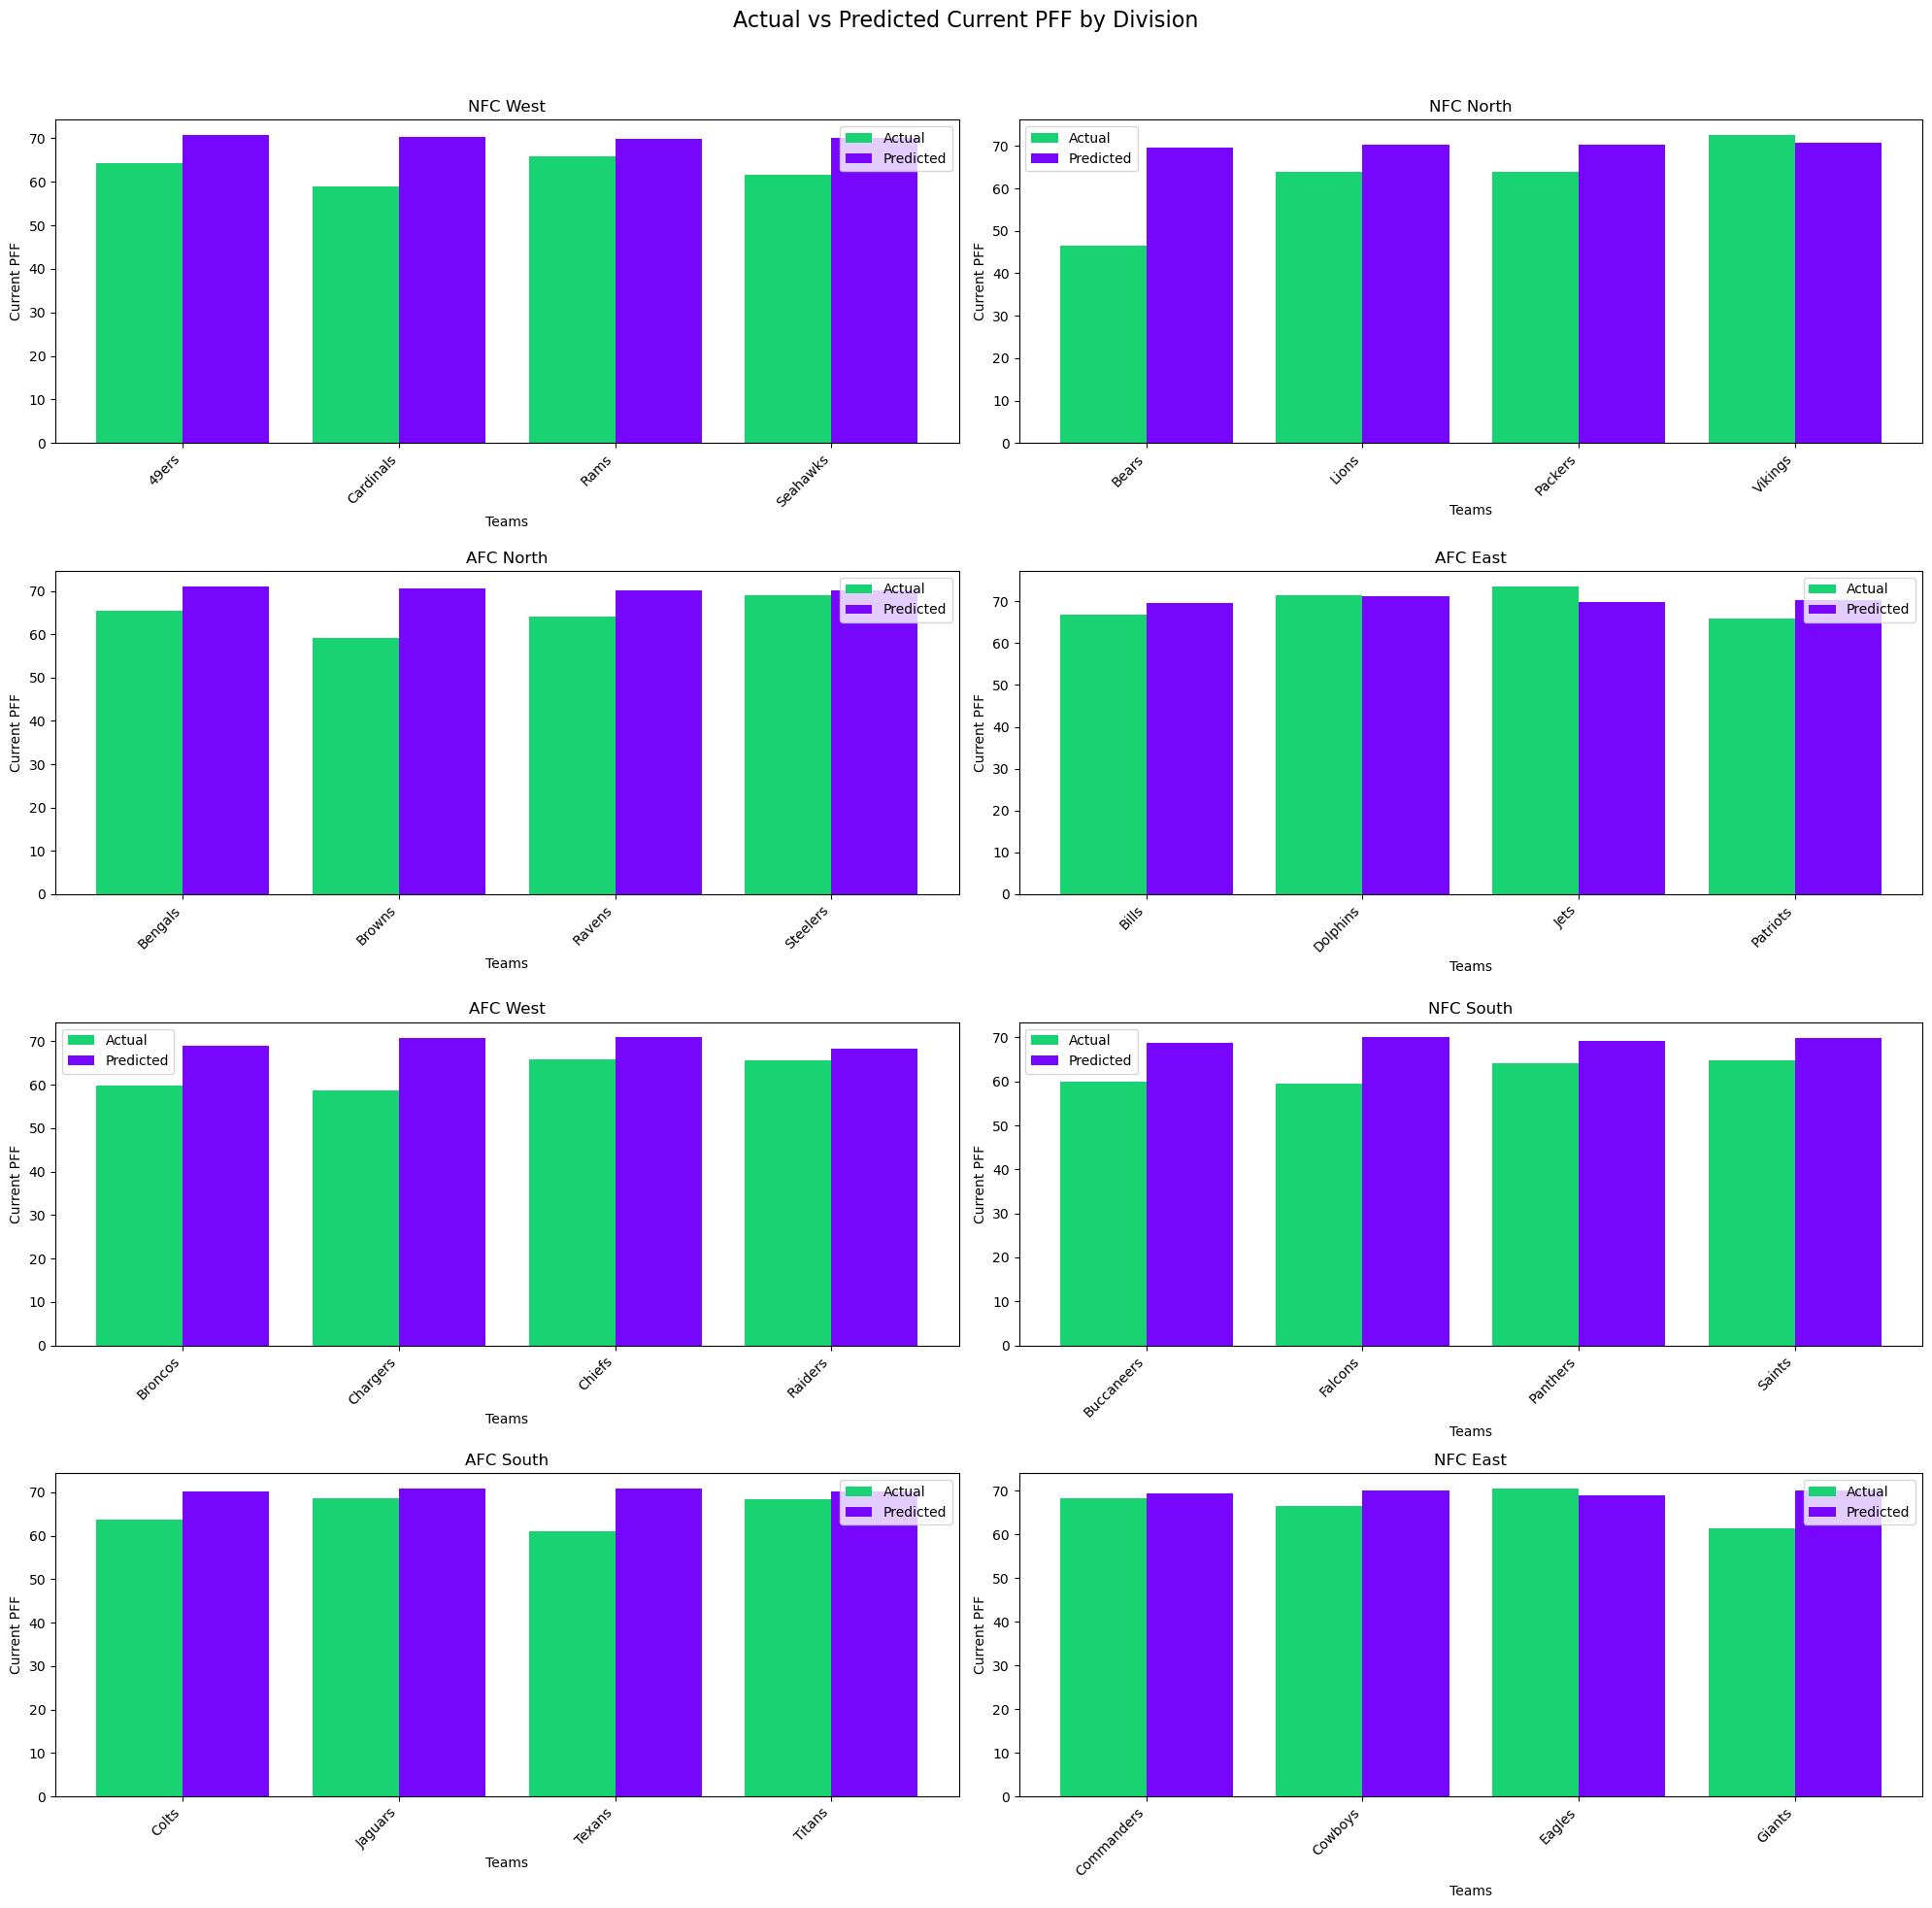

Epoch 1/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 137.3590 - val_loss: 15.3379
Epoch 2/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 96.1837 - val_loss: 21.4158
Epoch 3/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 96.7489 - val_loss: 28.7084
Epoch 4/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 121.7263 - val_loss: 33.1221
Epoch 5/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 111.9164 - val_loss: 23.2583
Epoch 6/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 78.6657 - val_loss: 18.2329
Epoch 7/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 84.7026 - val_loss: 16.5287
Epoch 8/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 61.3115 - val_loss: 16.4098
Epoch 9/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 88.8016 - val_loss: 16.4710
Epoch 10/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 111.8818 - val_loss: 17.4394
Epoch 11/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 100.6855 - val_loss: 19.2745
Epoch 12/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 106.9806 - v

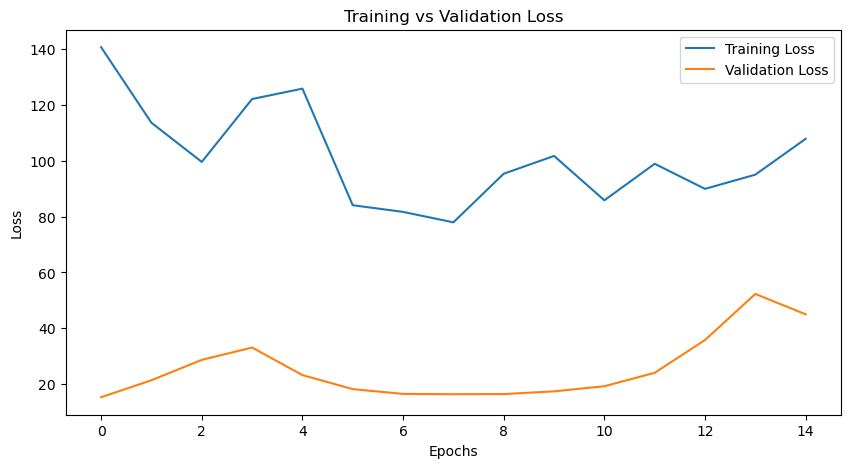

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
R² Score: -0.4503


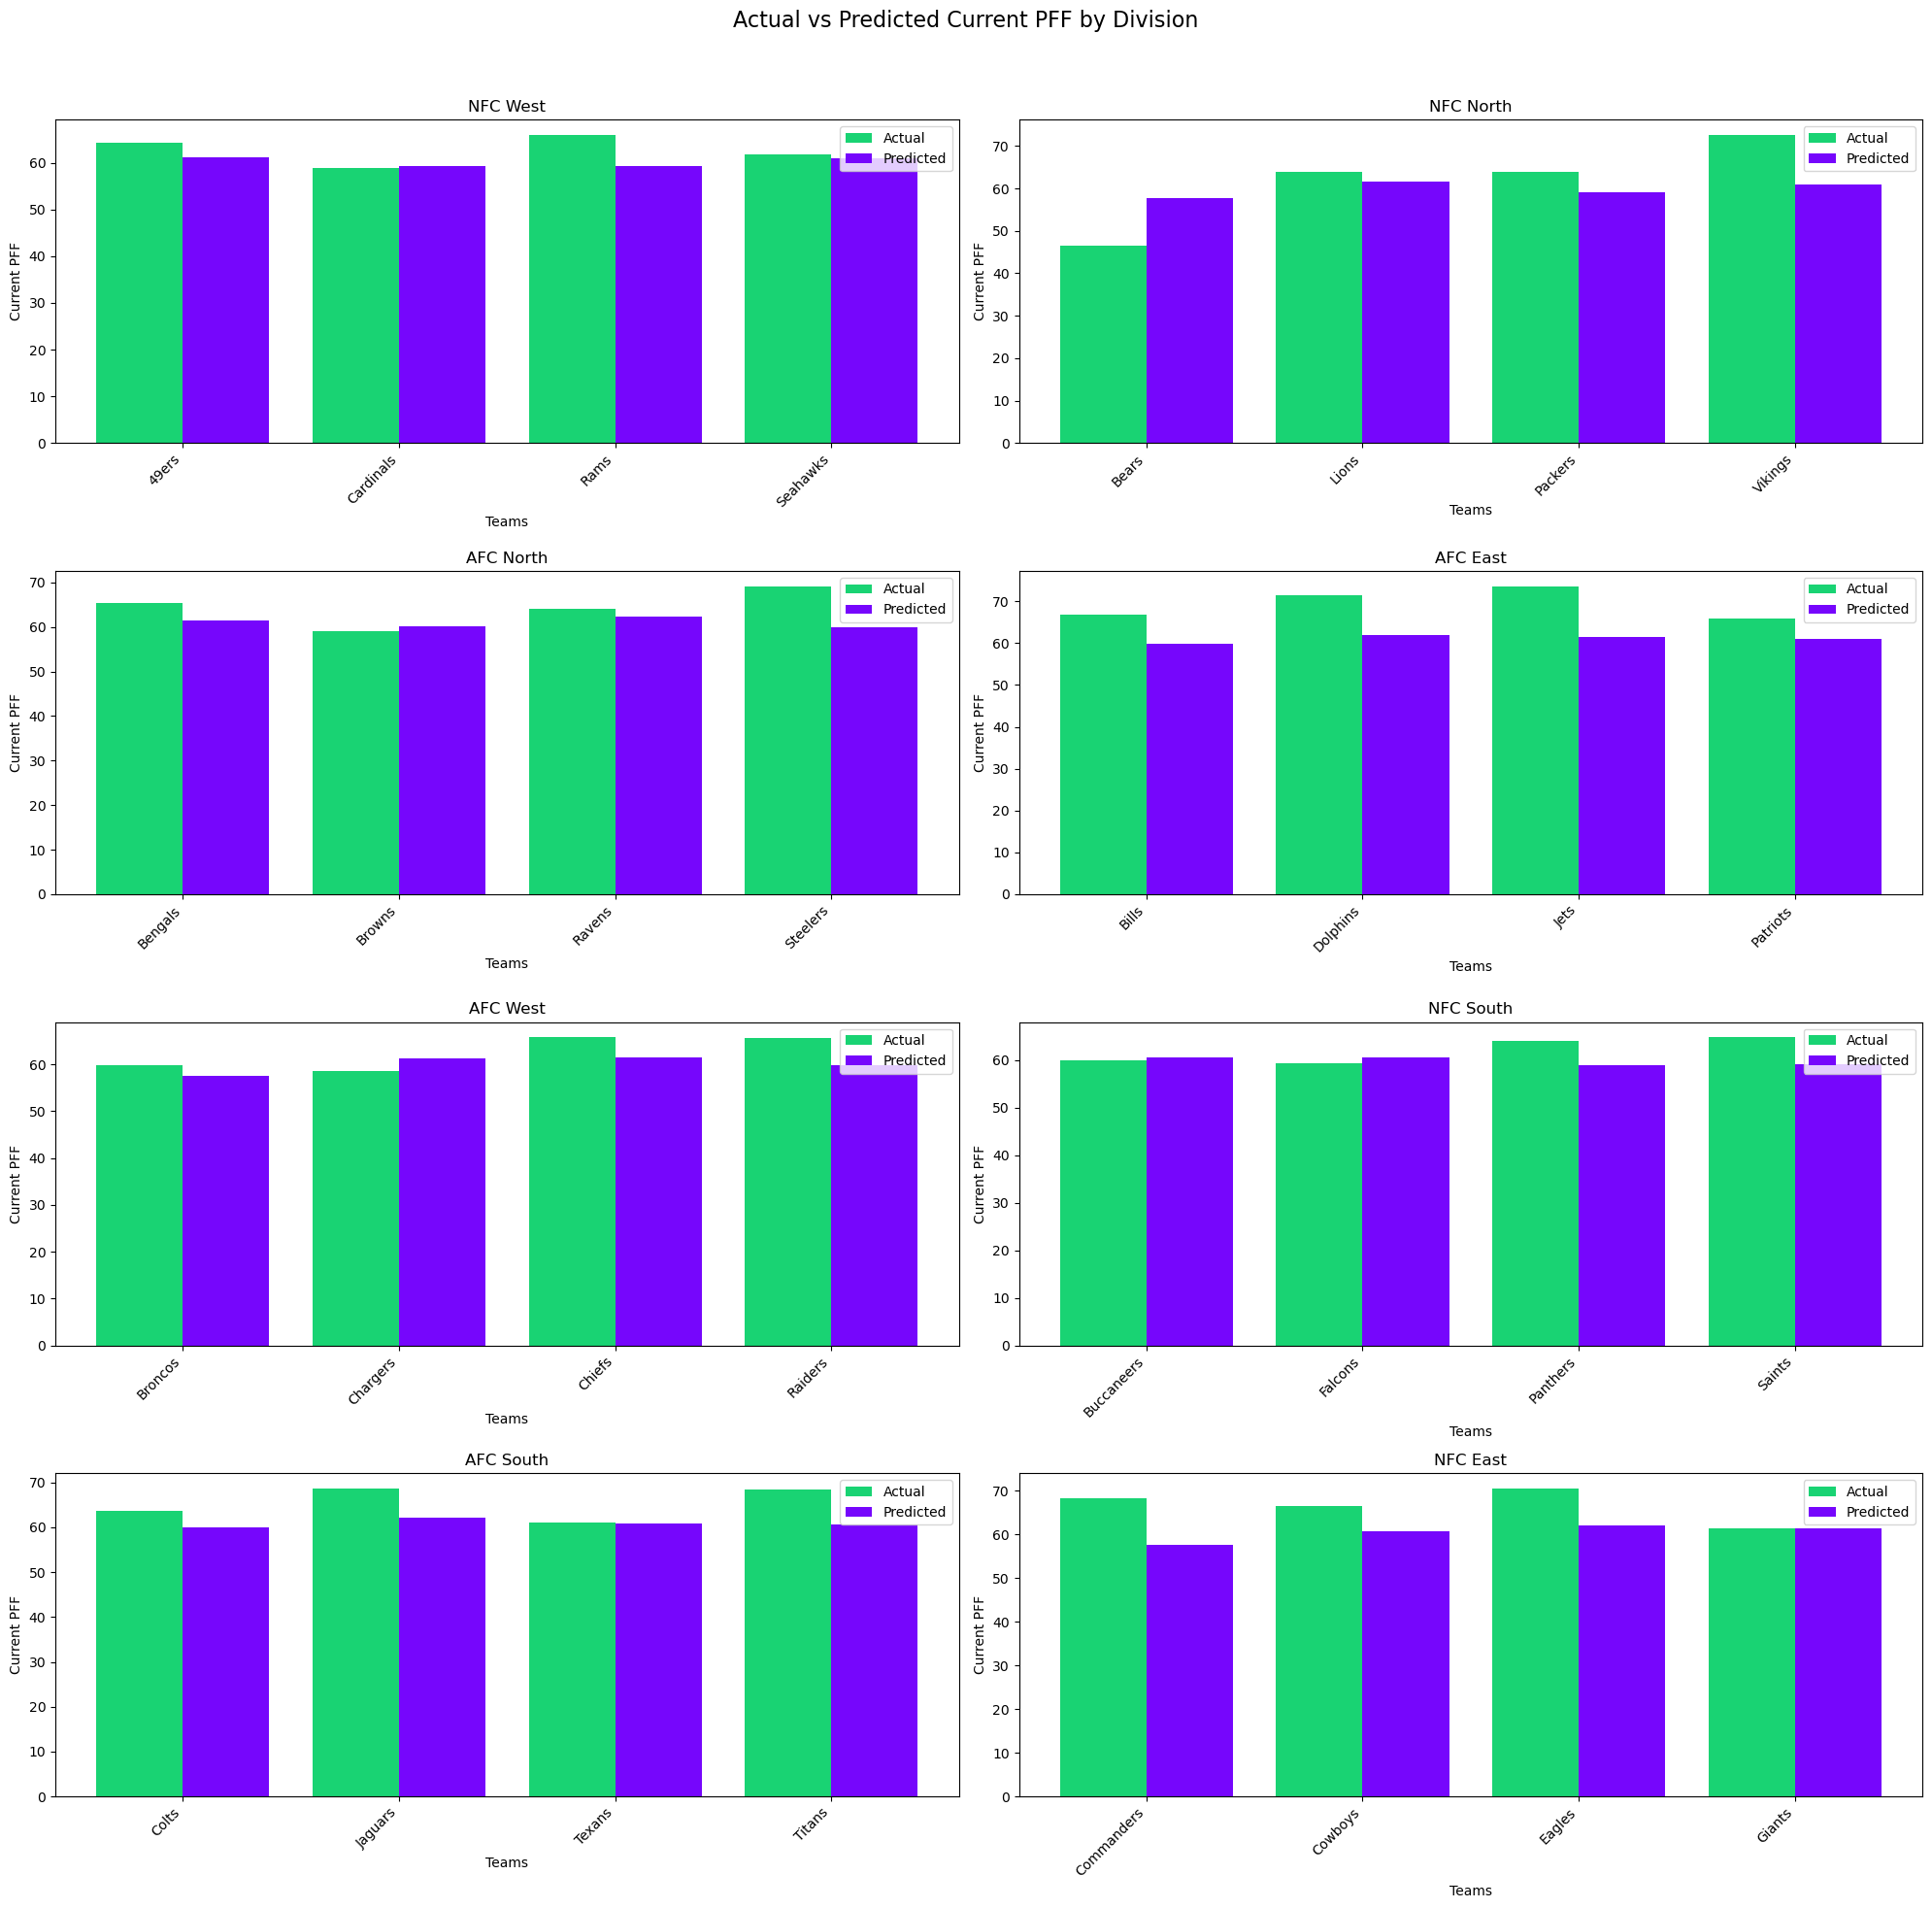

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 85.0212 - val_loss: 32.1095
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 62.0720 - val_loss: 23.0042
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 85.2987 - val_loss: 19.4115
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 48.8551 - val_loss: 18.7357
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 92.0636 - val_loss: 18.4524
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 104.3351 - val_loss: 18.7801
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 88.8343 - val_loss: 22.2178
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 121.1881 - val_loss: 26.4188
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 111.8314 - val_loss: 26.8968
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 79.2572 - val_loss: 26.6489
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 73.8315 - val_loss: 22.2321
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 77.3195 - val

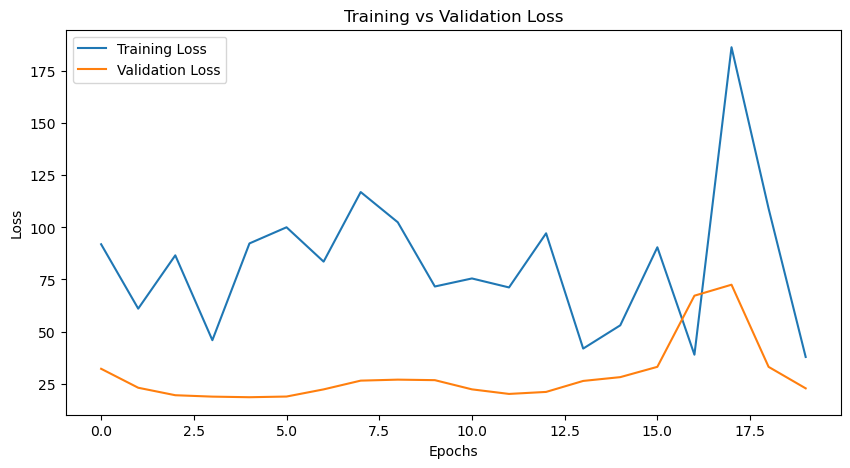

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R² Score: 0.1786


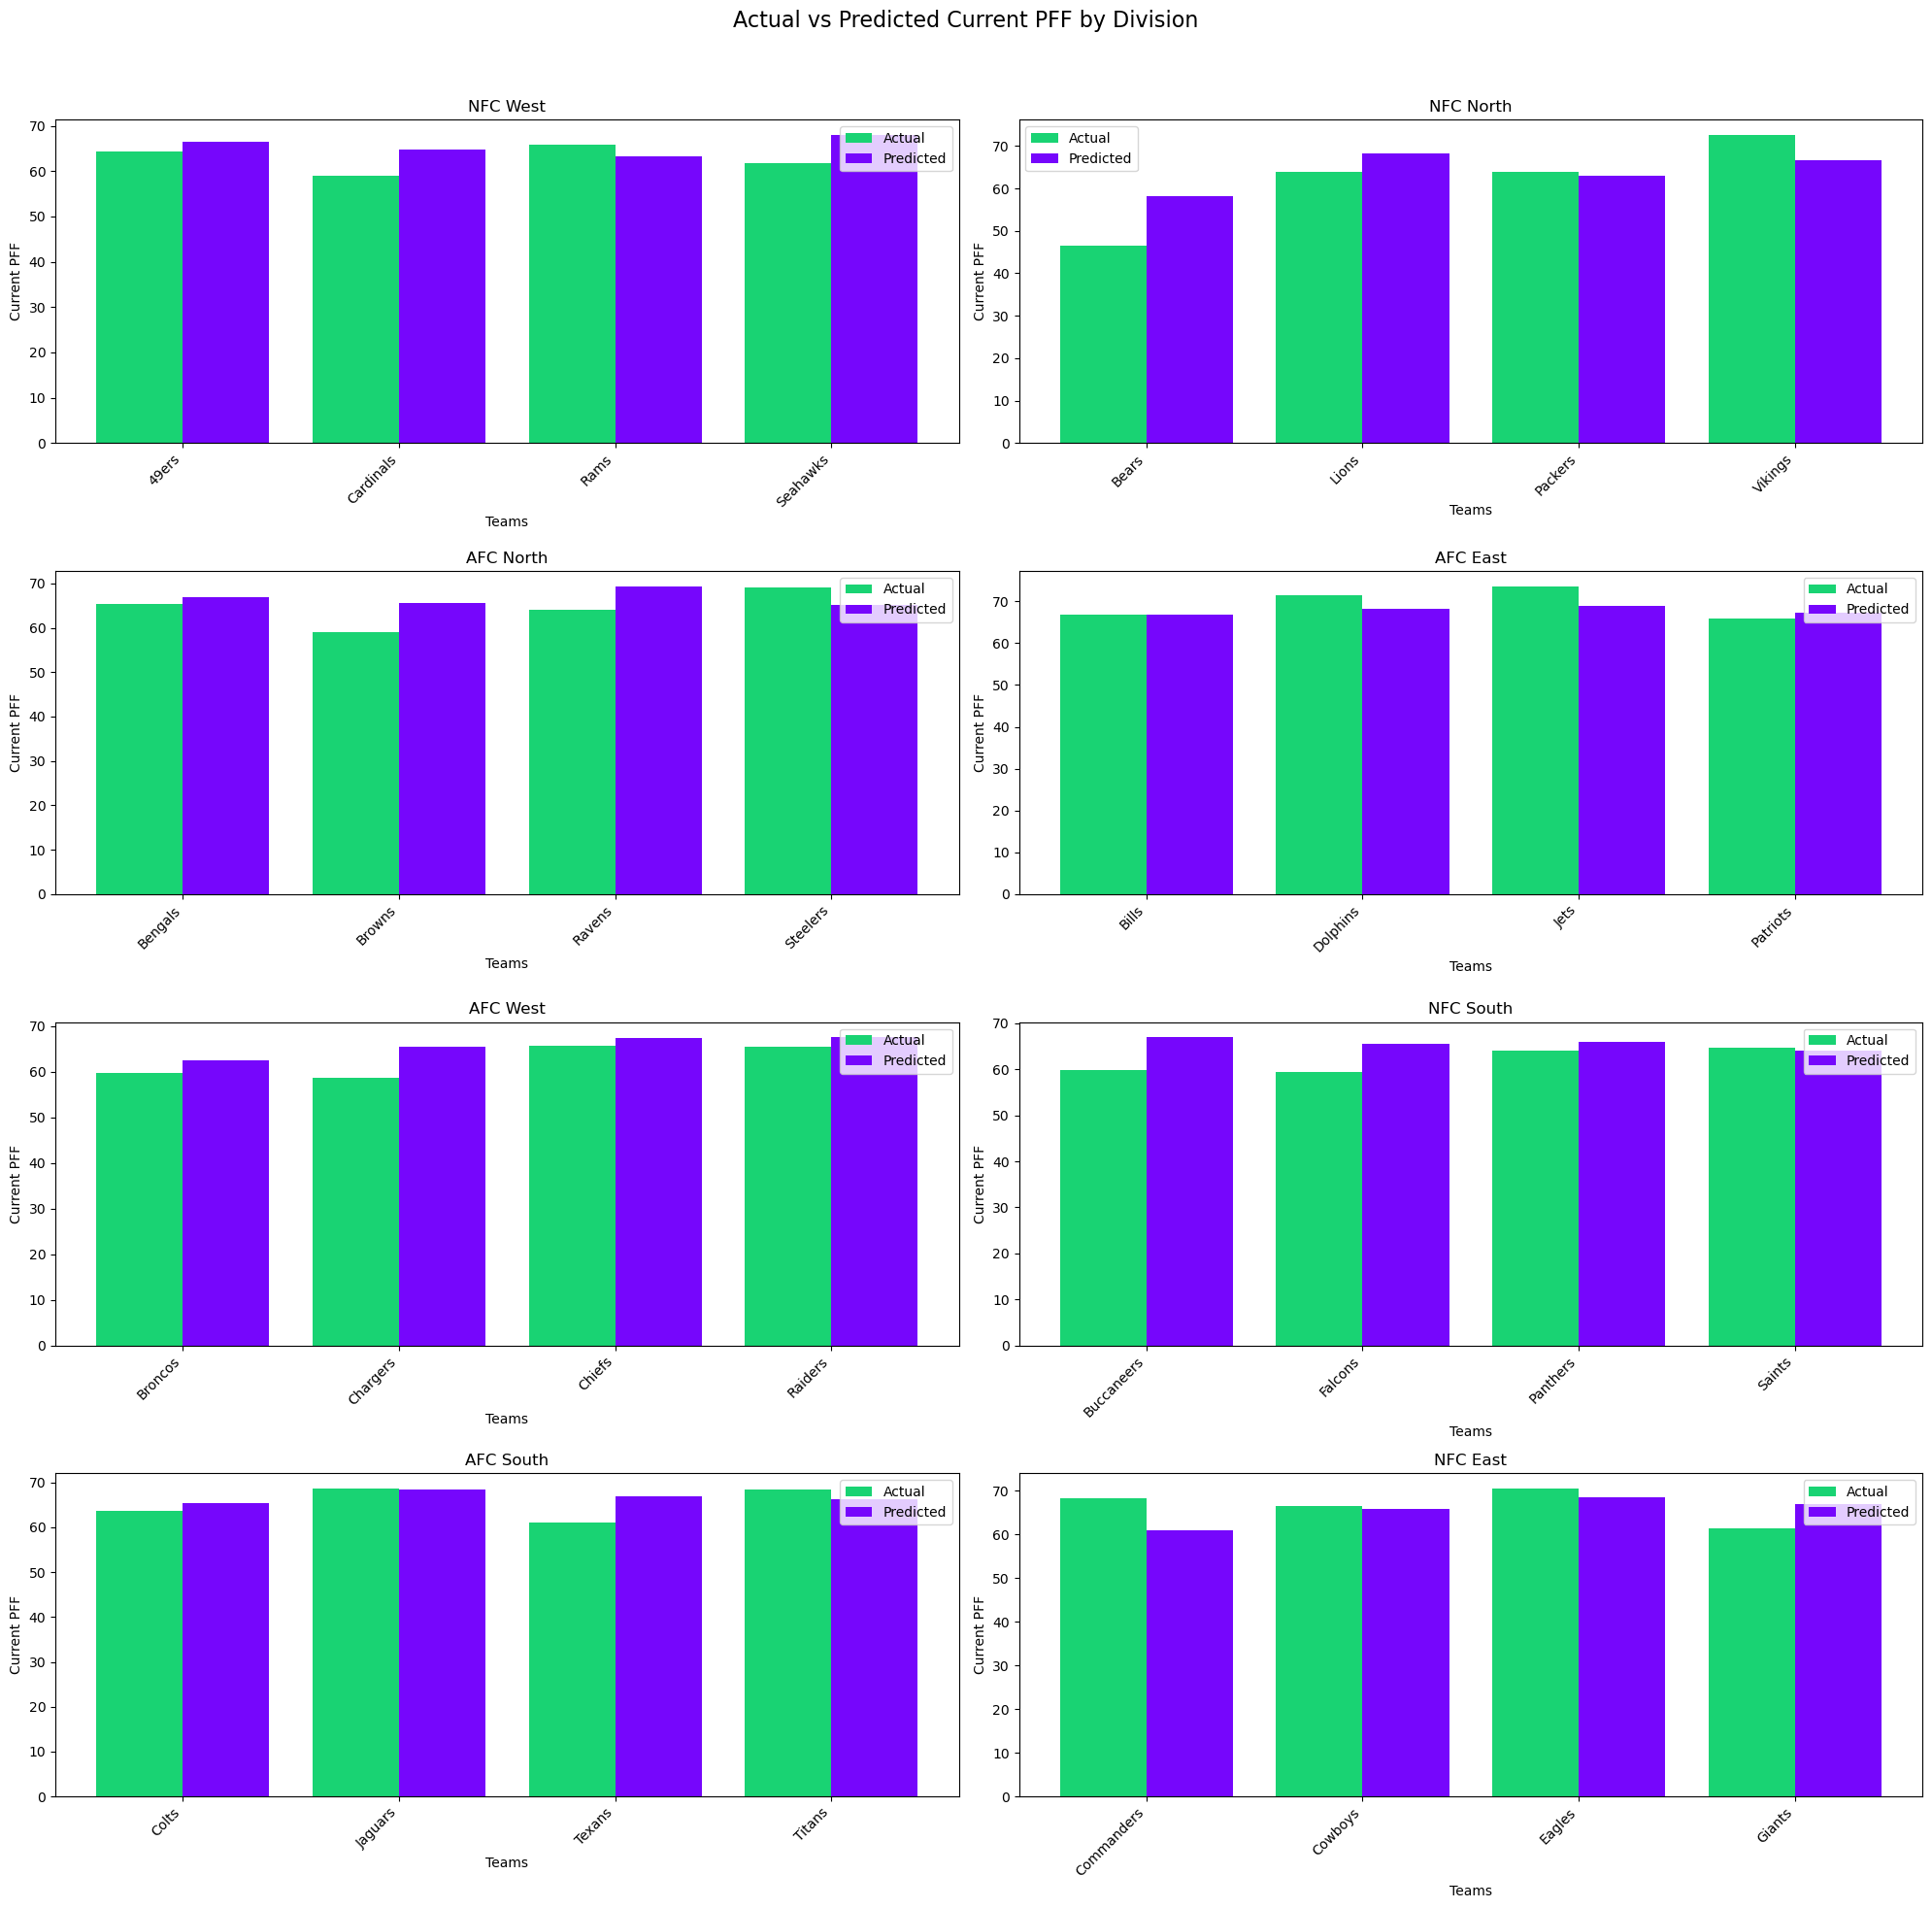

Epoch 1/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 107.7522 - val_loss: 33.0557
Epoch 2/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 120.1968 - val_loss: 23.5394
Epoch 3/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 90.9666 - val_loss: 43.3633
Epoch 4/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 58.3814 - val_loss: 72.6670
Epoch 5/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 74.8947 - val_loss: 69.9759
Epoch 6/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 141.3072 - val_loss: 37.6985
Epoch 7/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 39.9456 - val_loss: 22.3603
Epoch 8/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 74.2458 - val_loss: 25.1219
Epoch 9/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 118.3923 - val_loss: 31.5049
Epoch 10/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 72.3737 - val_loss: 27.5511
Epoch 11/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 71.2144 - val_loss: 22.7794
Epoch 12/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 70.3759 - va

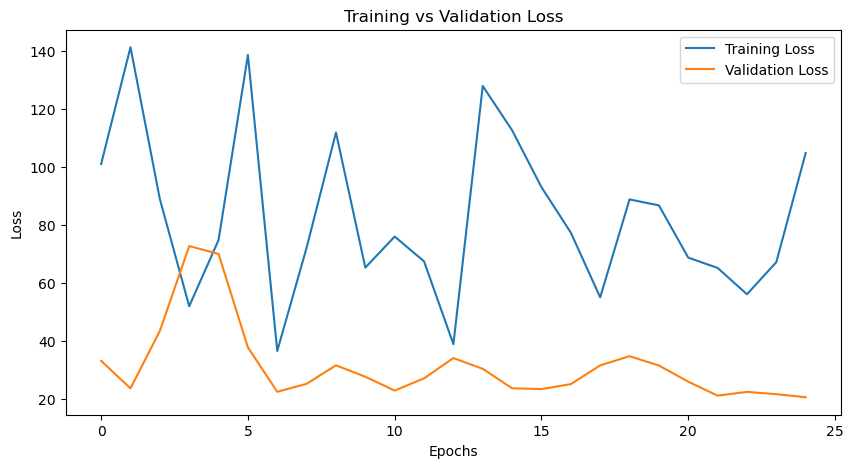

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
R² Score: 0.3397


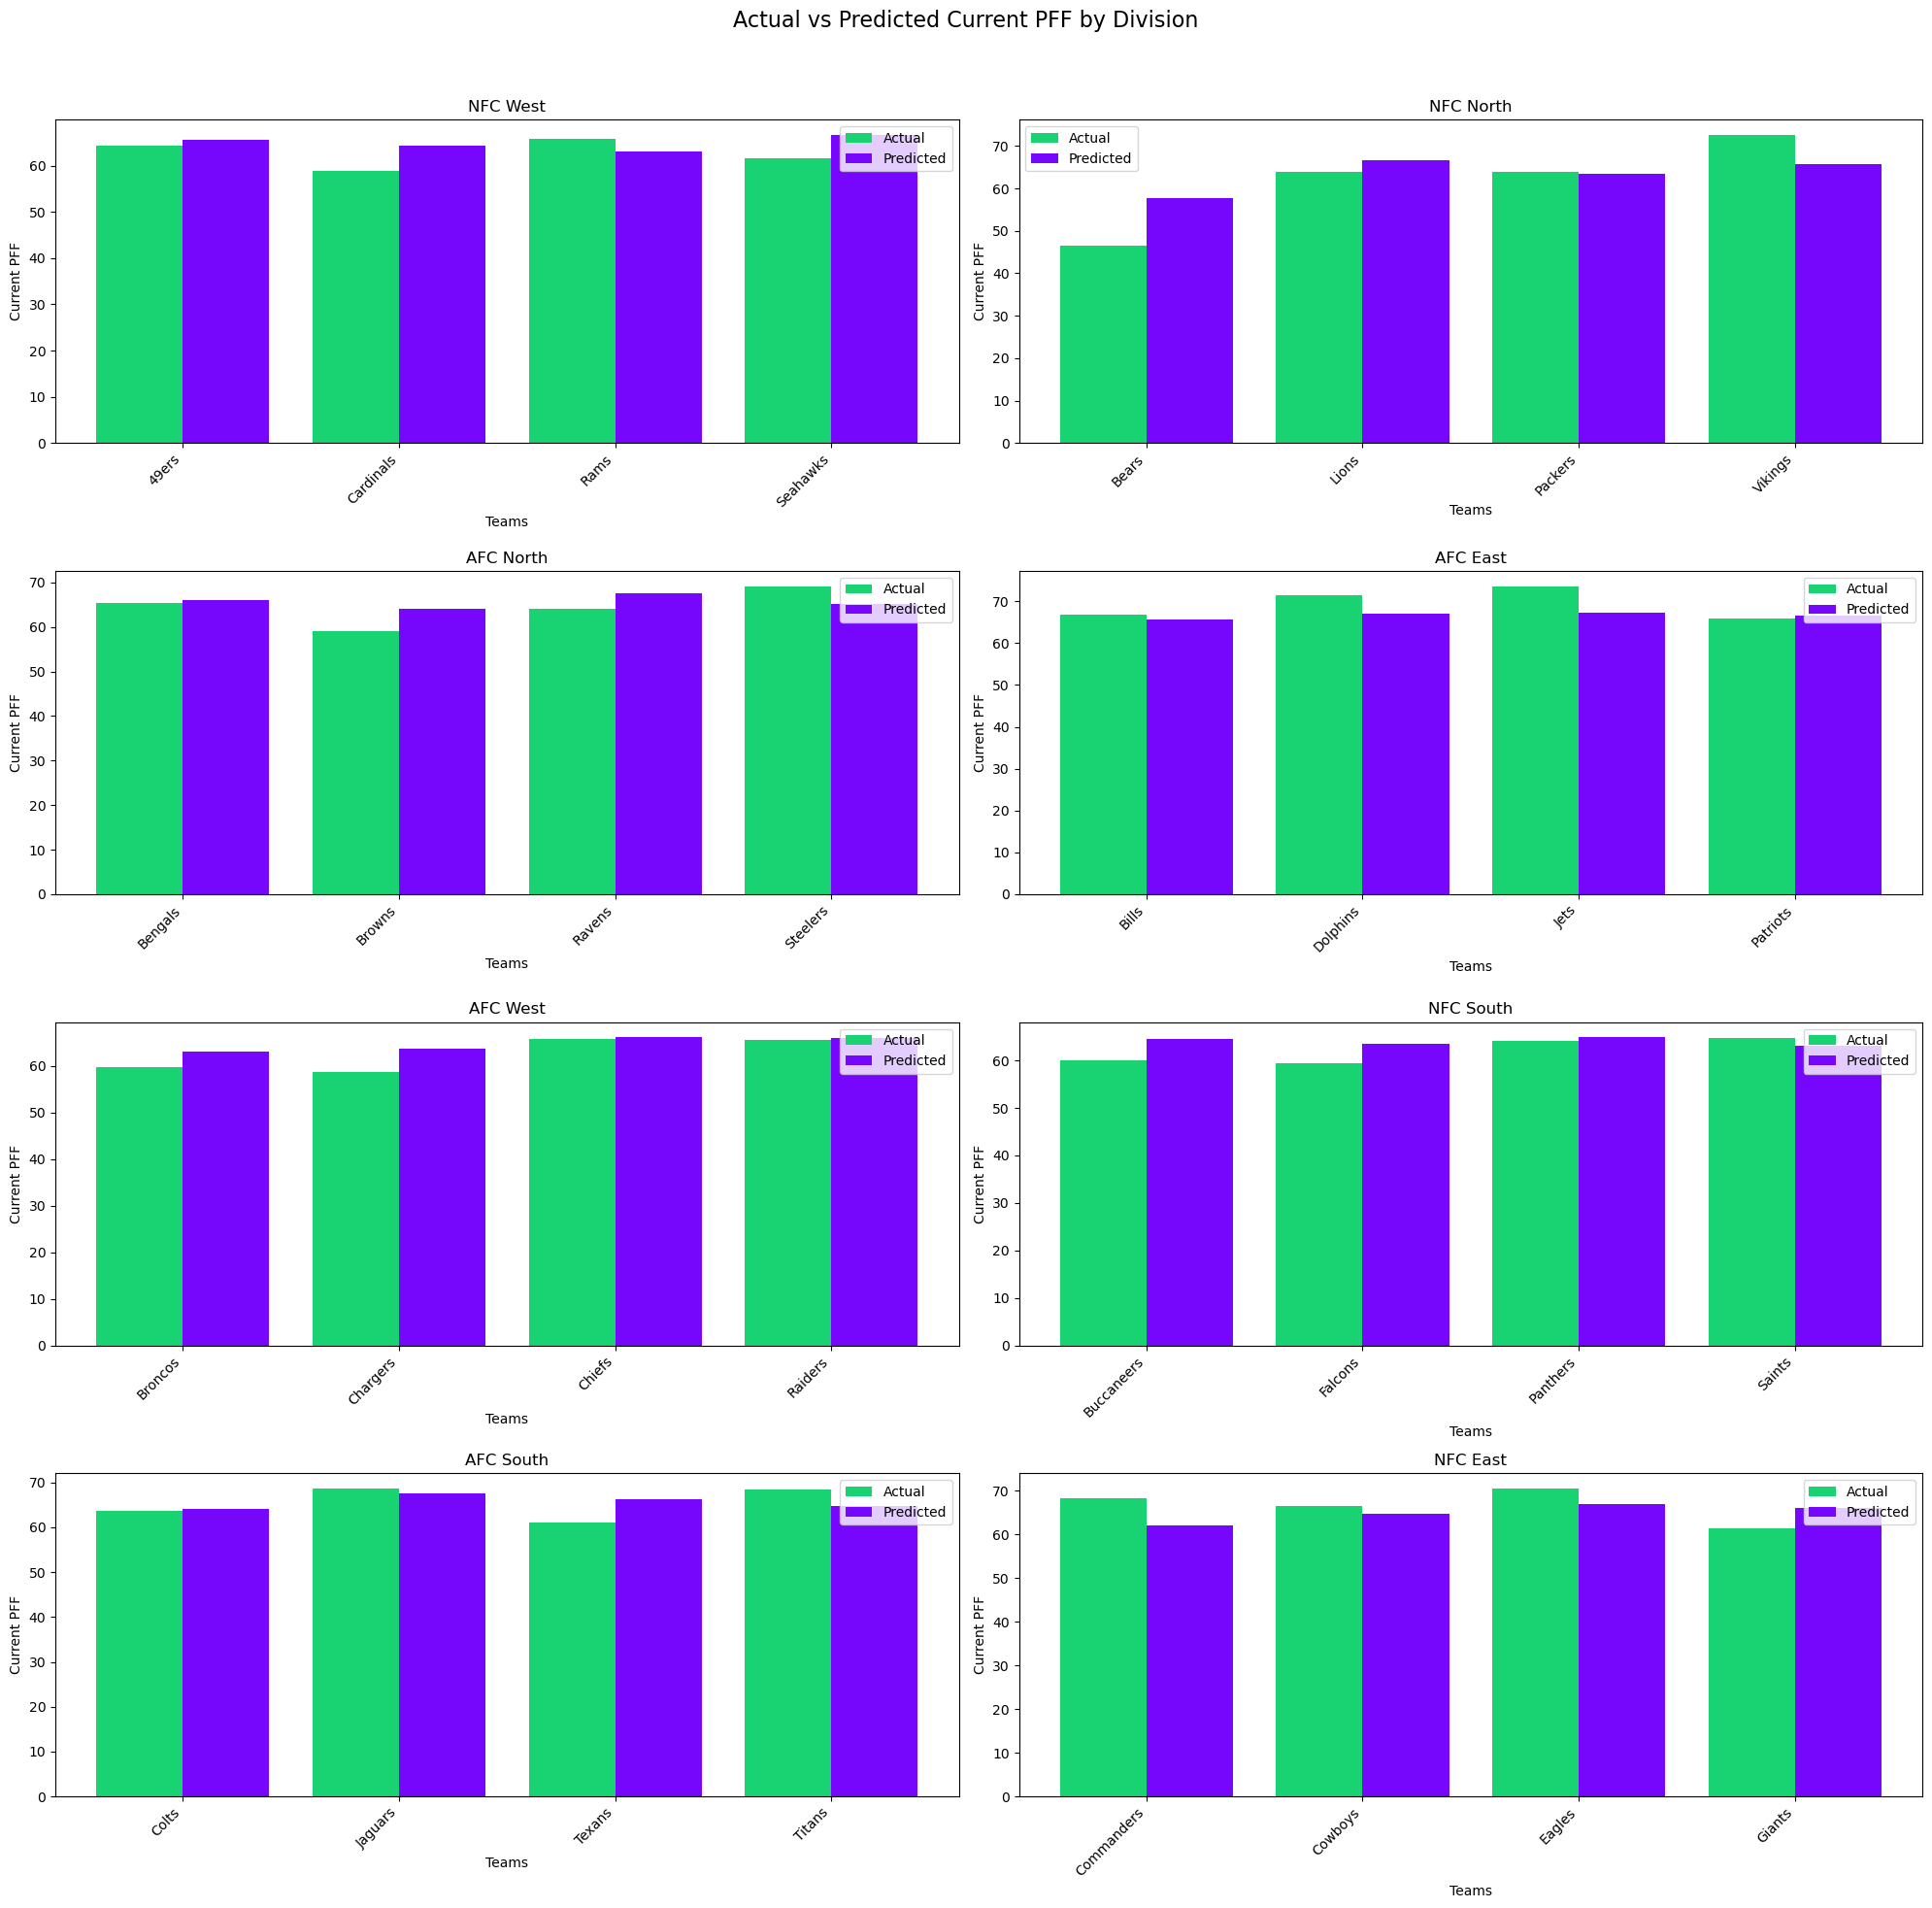

Epoch 1/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 71.8874 - val_loss: 24.9836
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 71.2433 - val_loss: 31.6658
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 50.3640 - val_loss: 31.5931
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 89.3498 - val_loss: 29.5296
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 48.0160 - val_loss: 23.7958
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 100.4901 - val_loss: 21.0893
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 56.3329 - val_loss: 21.2506
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 83.1269 - val_loss: 21.2703
Epoch 9/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 53.1845 - val_loss: 21.2455
Epoch 10/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 80.3284 - val_loss: 25.3856
Epoch 11/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 84.5853 - val_loss: 34.4964
Epoch 12/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 56.9795 - val_l

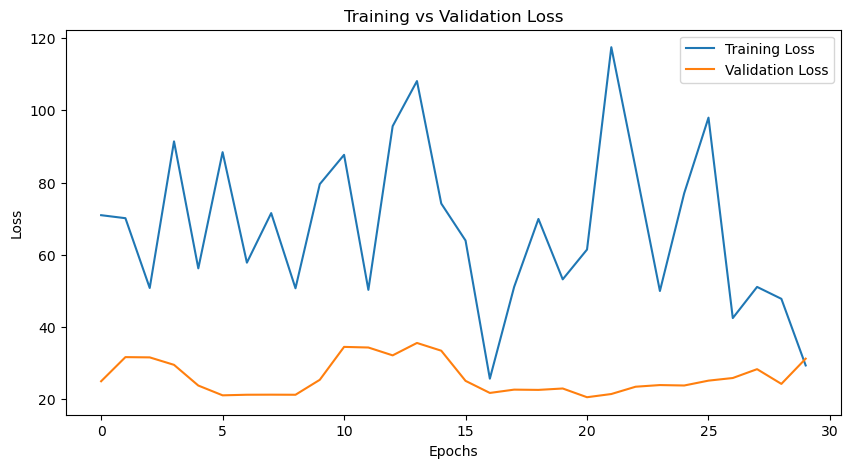

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
R² Score: 0.3141


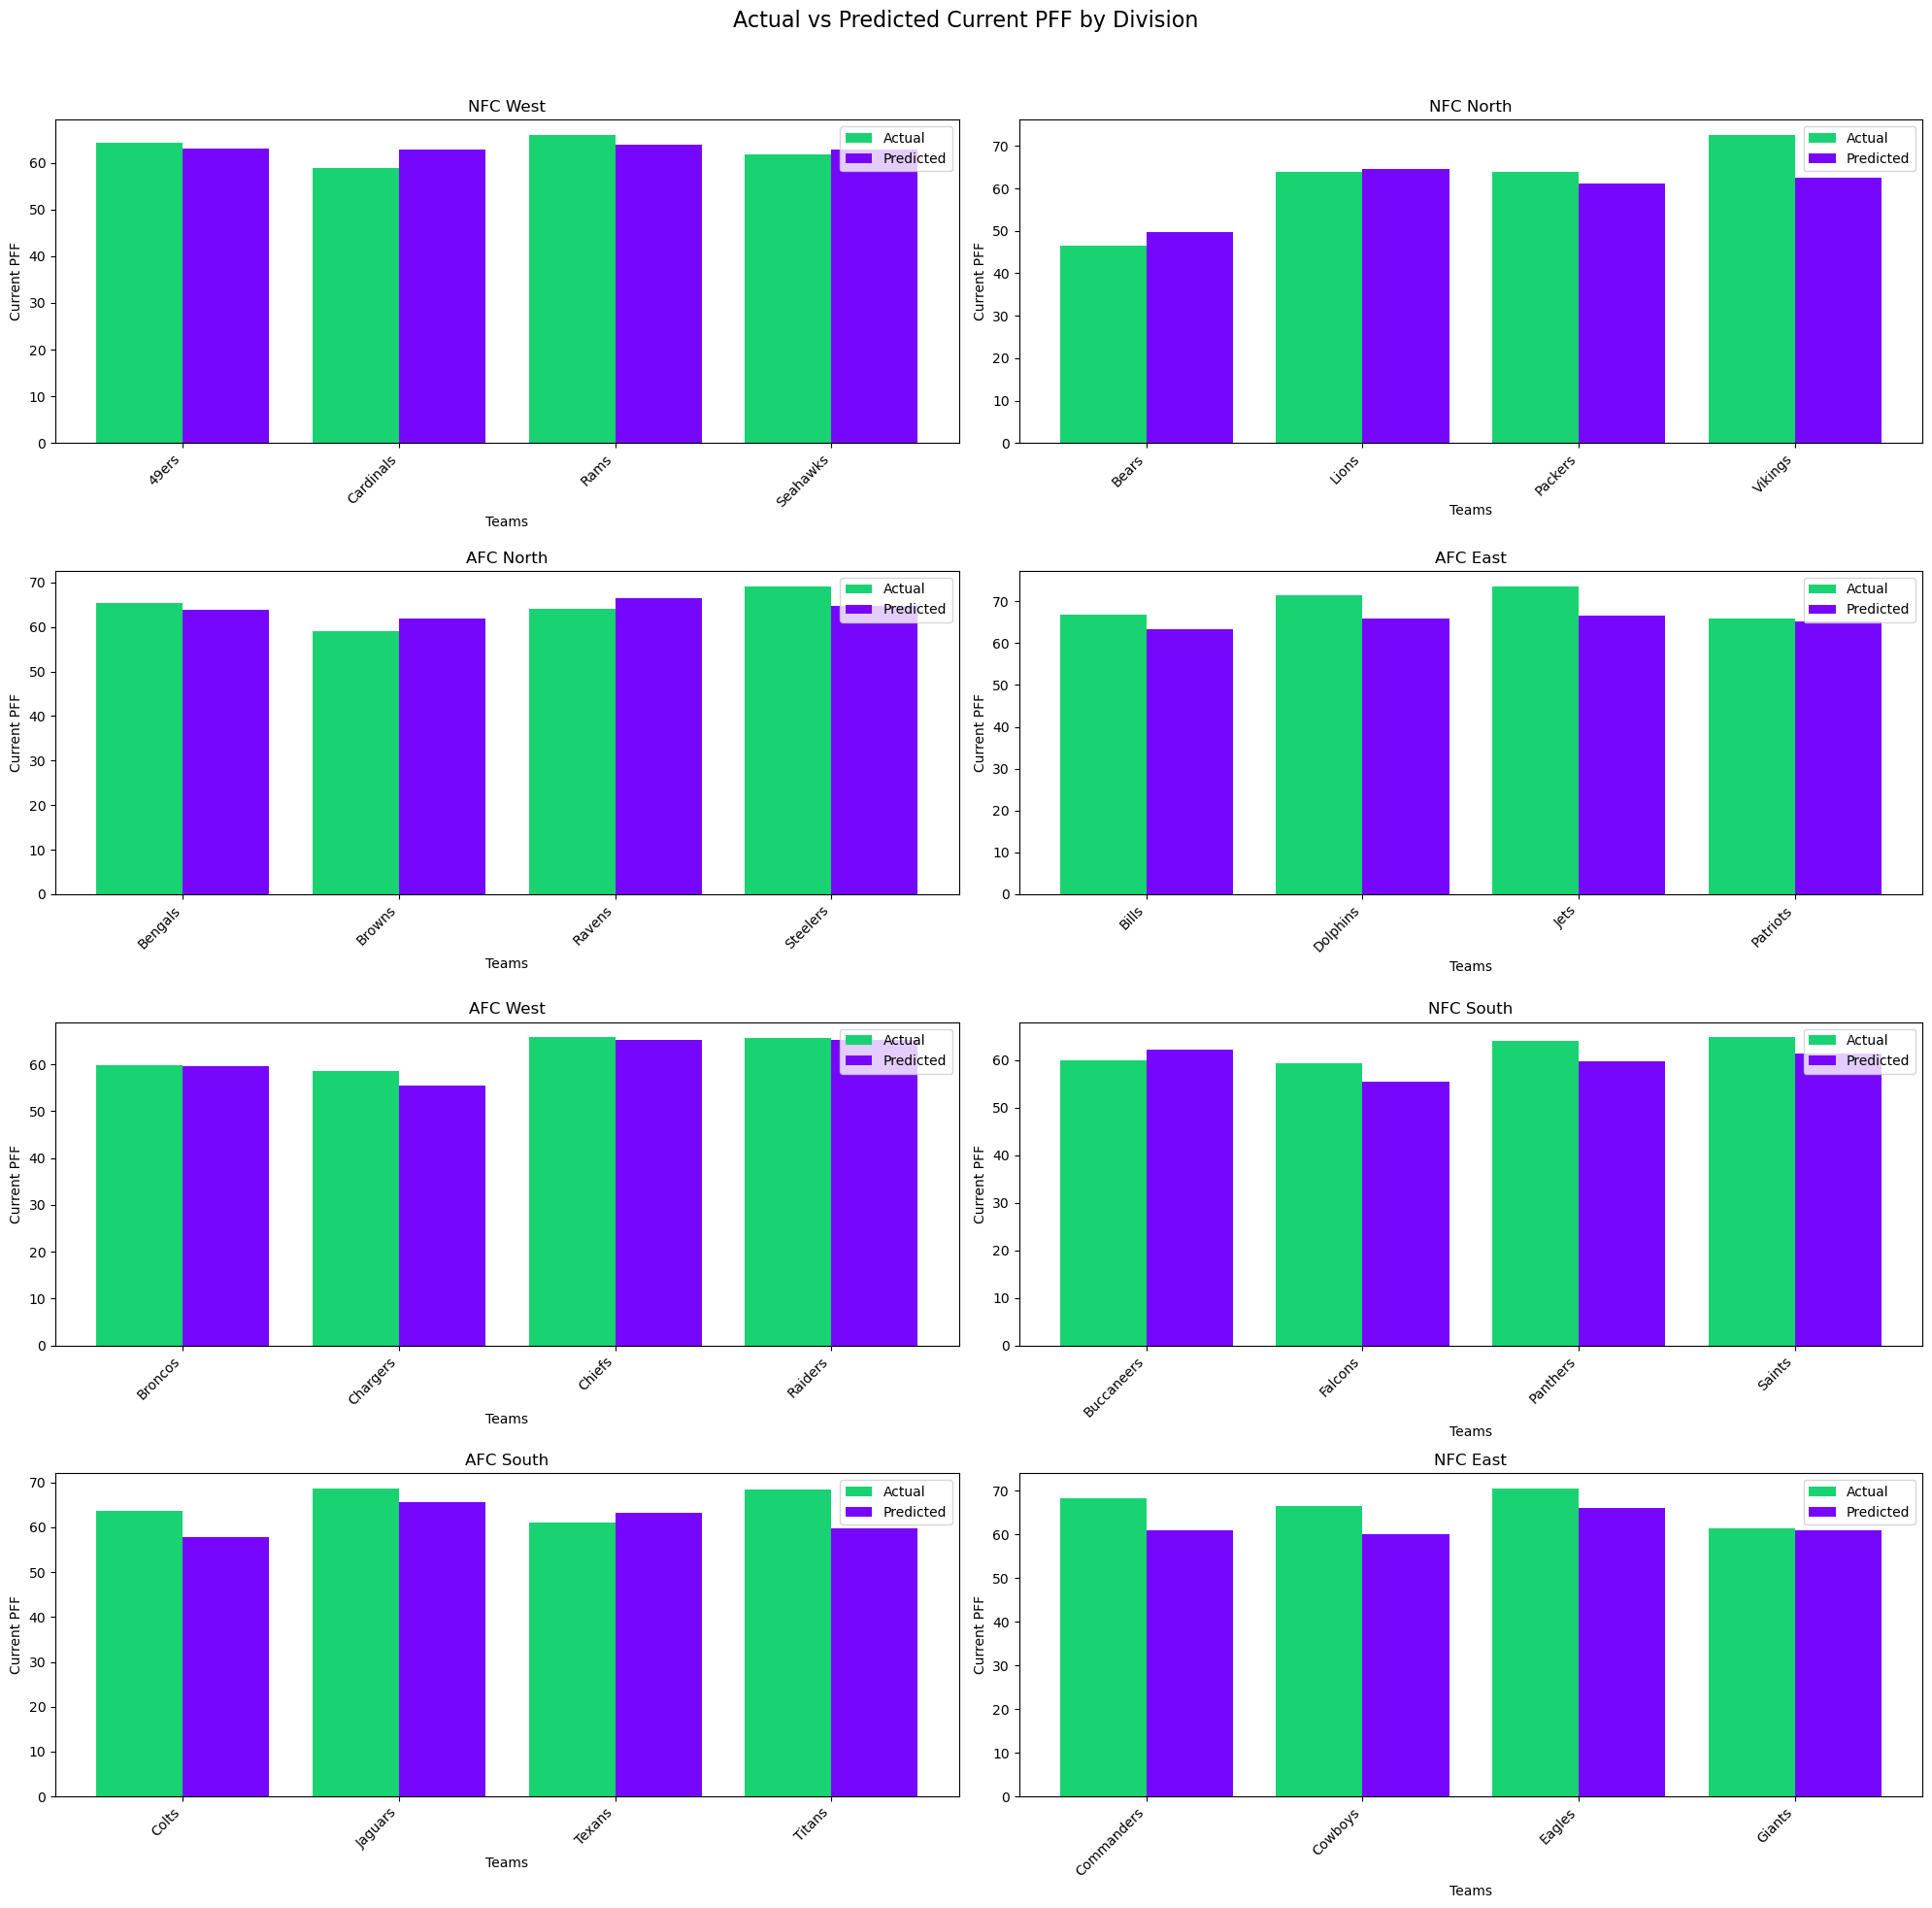

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 51.2906 - val_loss: 39.9781
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 103.2903 - val_loss: 29.0379
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 39.5502 - val_loss: 26.9071
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 32.9480 - val_loss: 39.1093
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 31.7961 - val_loss: 57.1298
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 84.5297 - val_loss: 60.7080
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 67.0195 - val_loss: 44.1430
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 113.9463 - val_loss: 20.3543
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 91.9341 - val_loss: 20.9727
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 91.7088 - val_loss: 18.3723
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 109.8951 - val_loss: 20.6285
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 59.6484 - val_

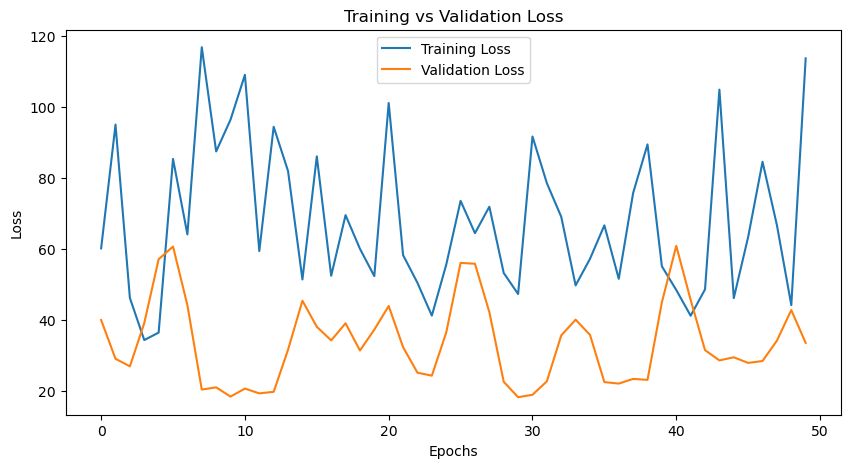

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
R² Score: 0.5069


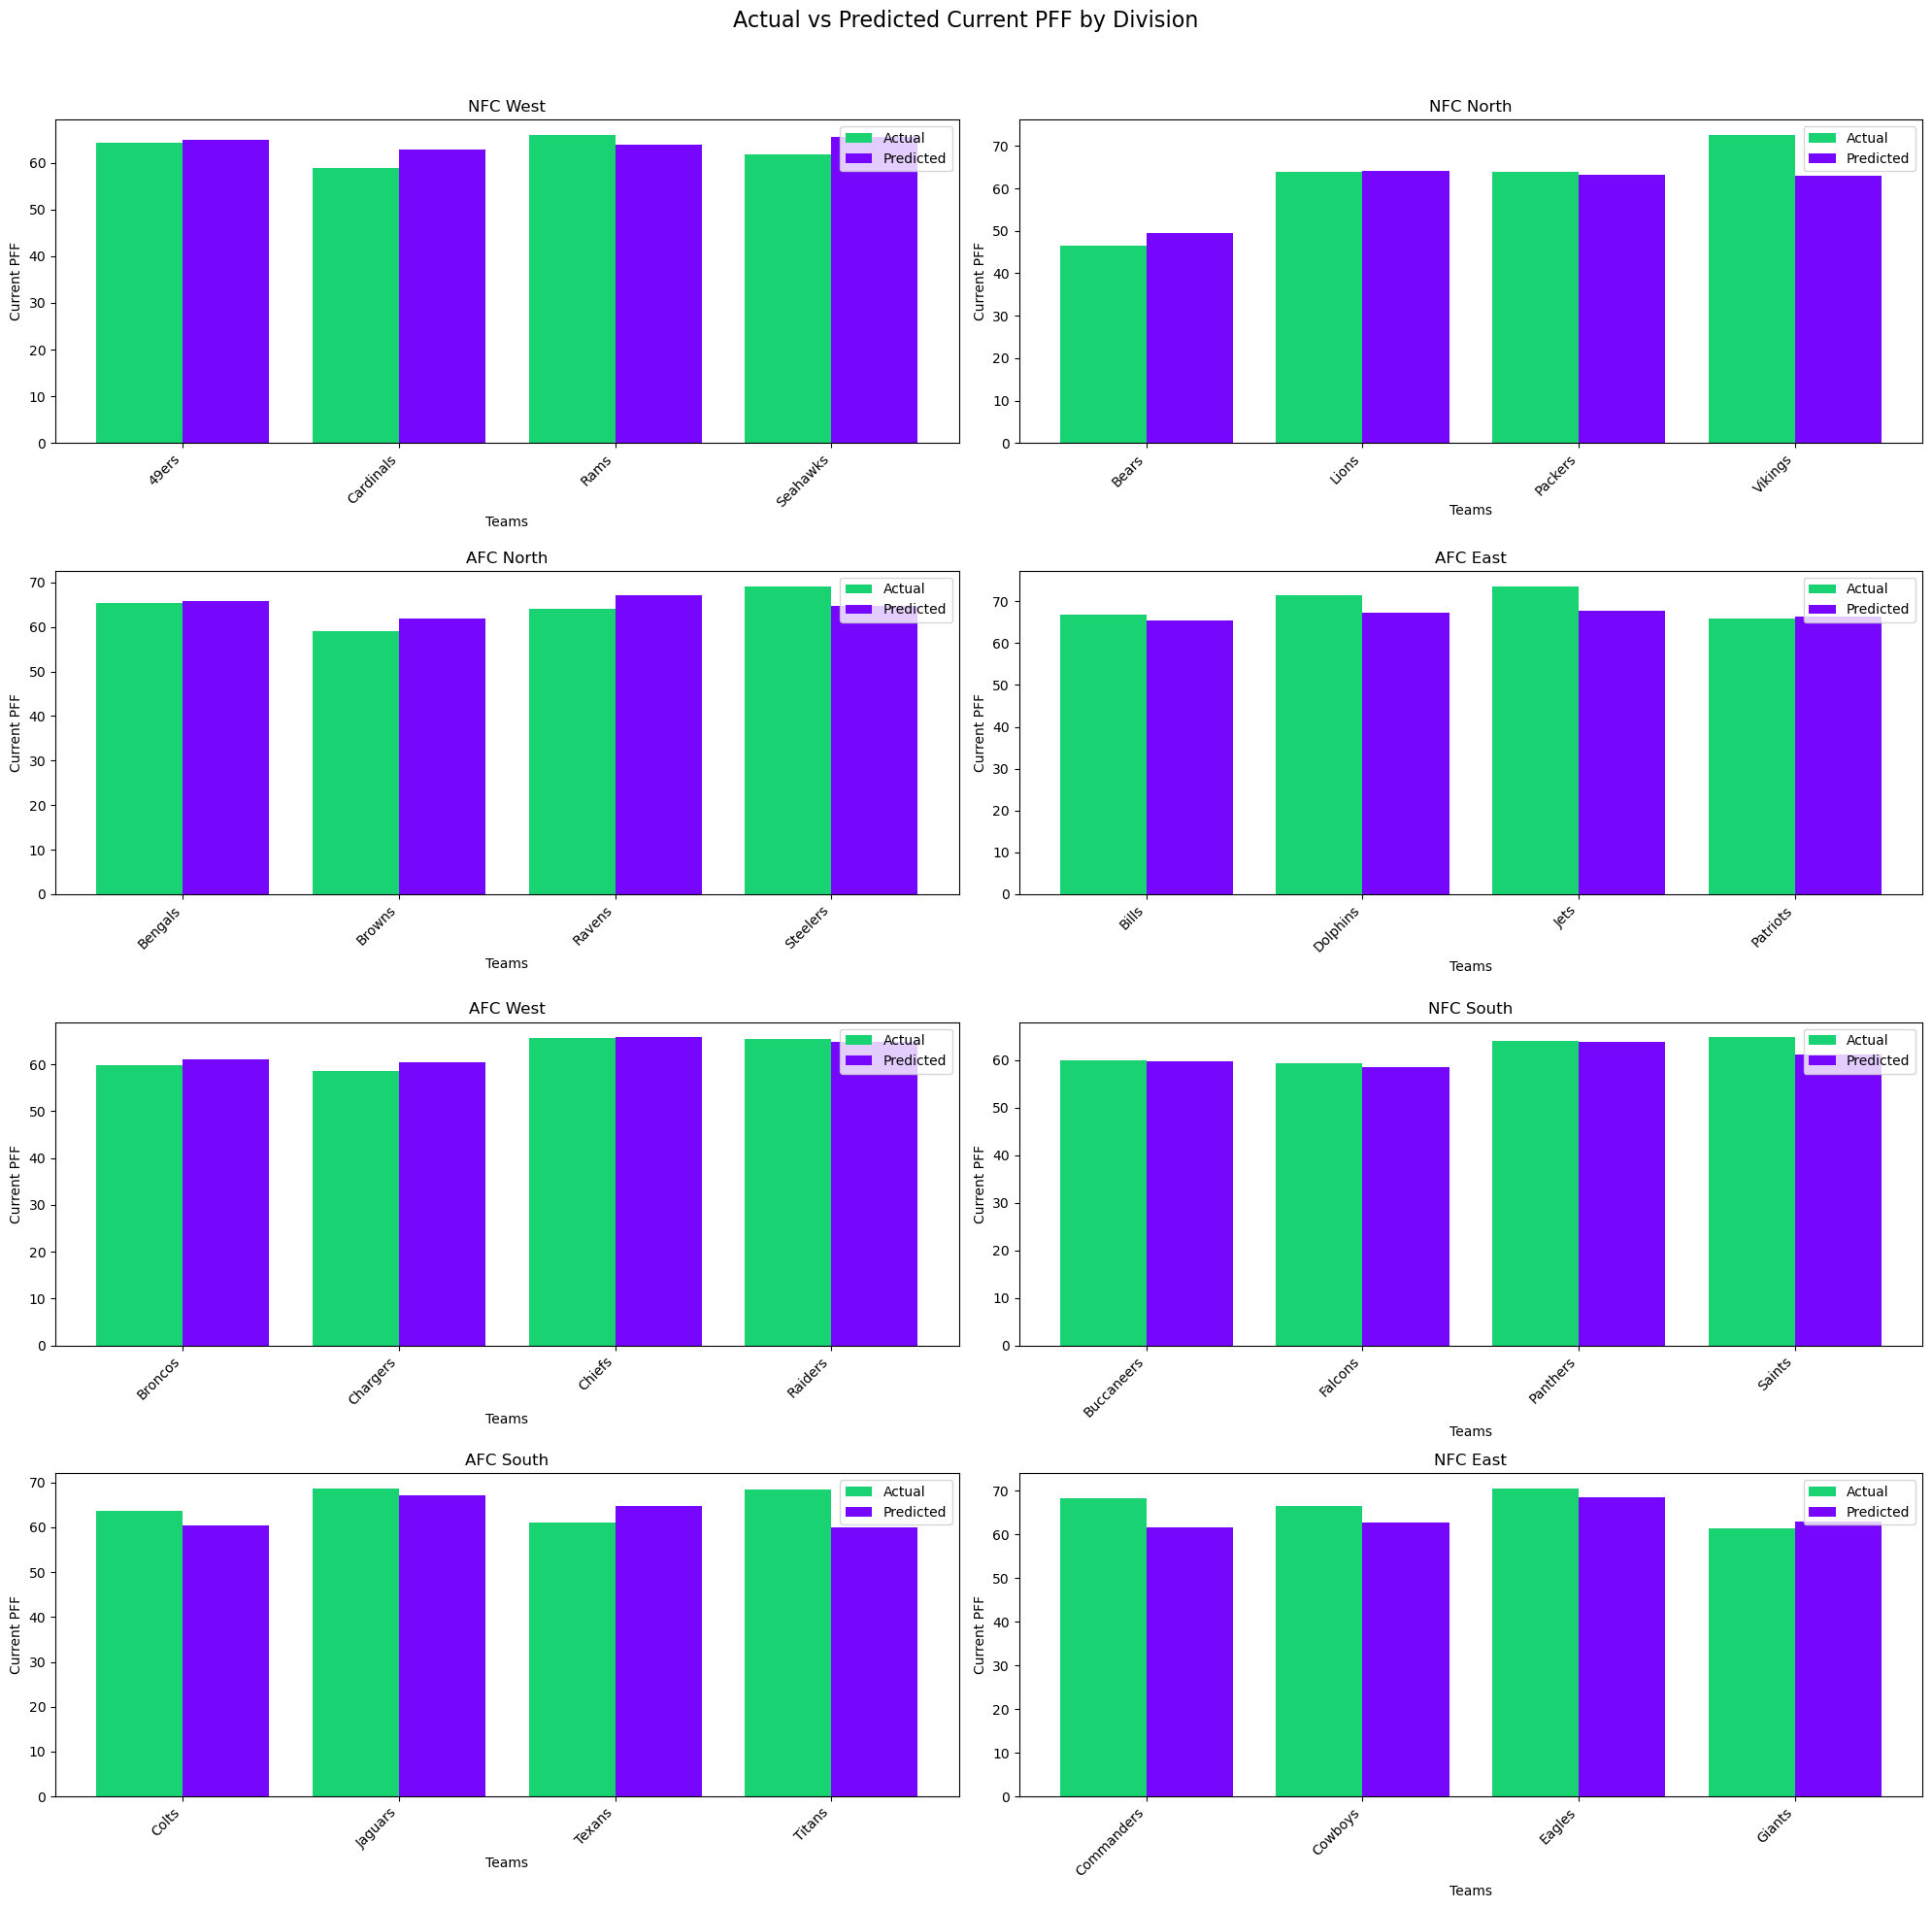

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 69.0245 - val_loss: 32.7889
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 54.6109 - val_loss: 37.3209
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 39.0425 - val_loss: 40.6555
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 82.3669 - val_loss: 32.6718
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 41.9146 - val_loss: 29.4593
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 40.9521 - val_loss: 29.0630
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 76.9062 - val_loss: 36.2527
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 31.5052 - val_loss: 37.8210
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 60.9130 - val_loss: 43.1112
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 70.4598 - val_loss: 37.9291
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 44.1216 - val_loss: 34.1682
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 52.46

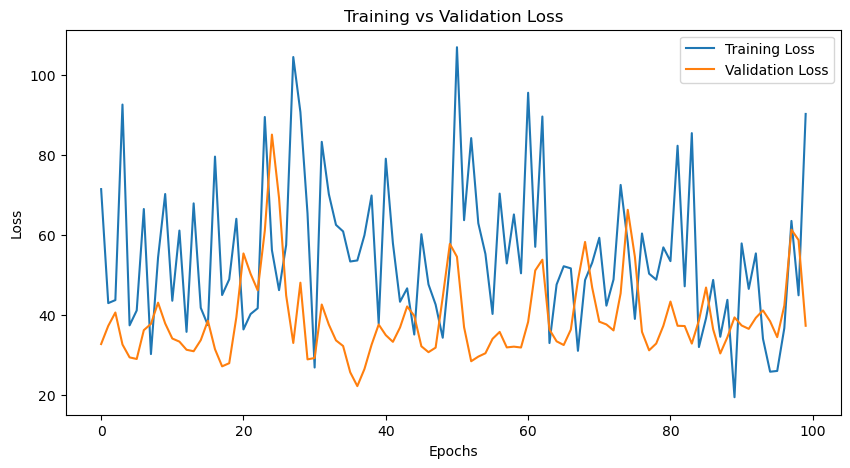

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
R² Score: 0.5898


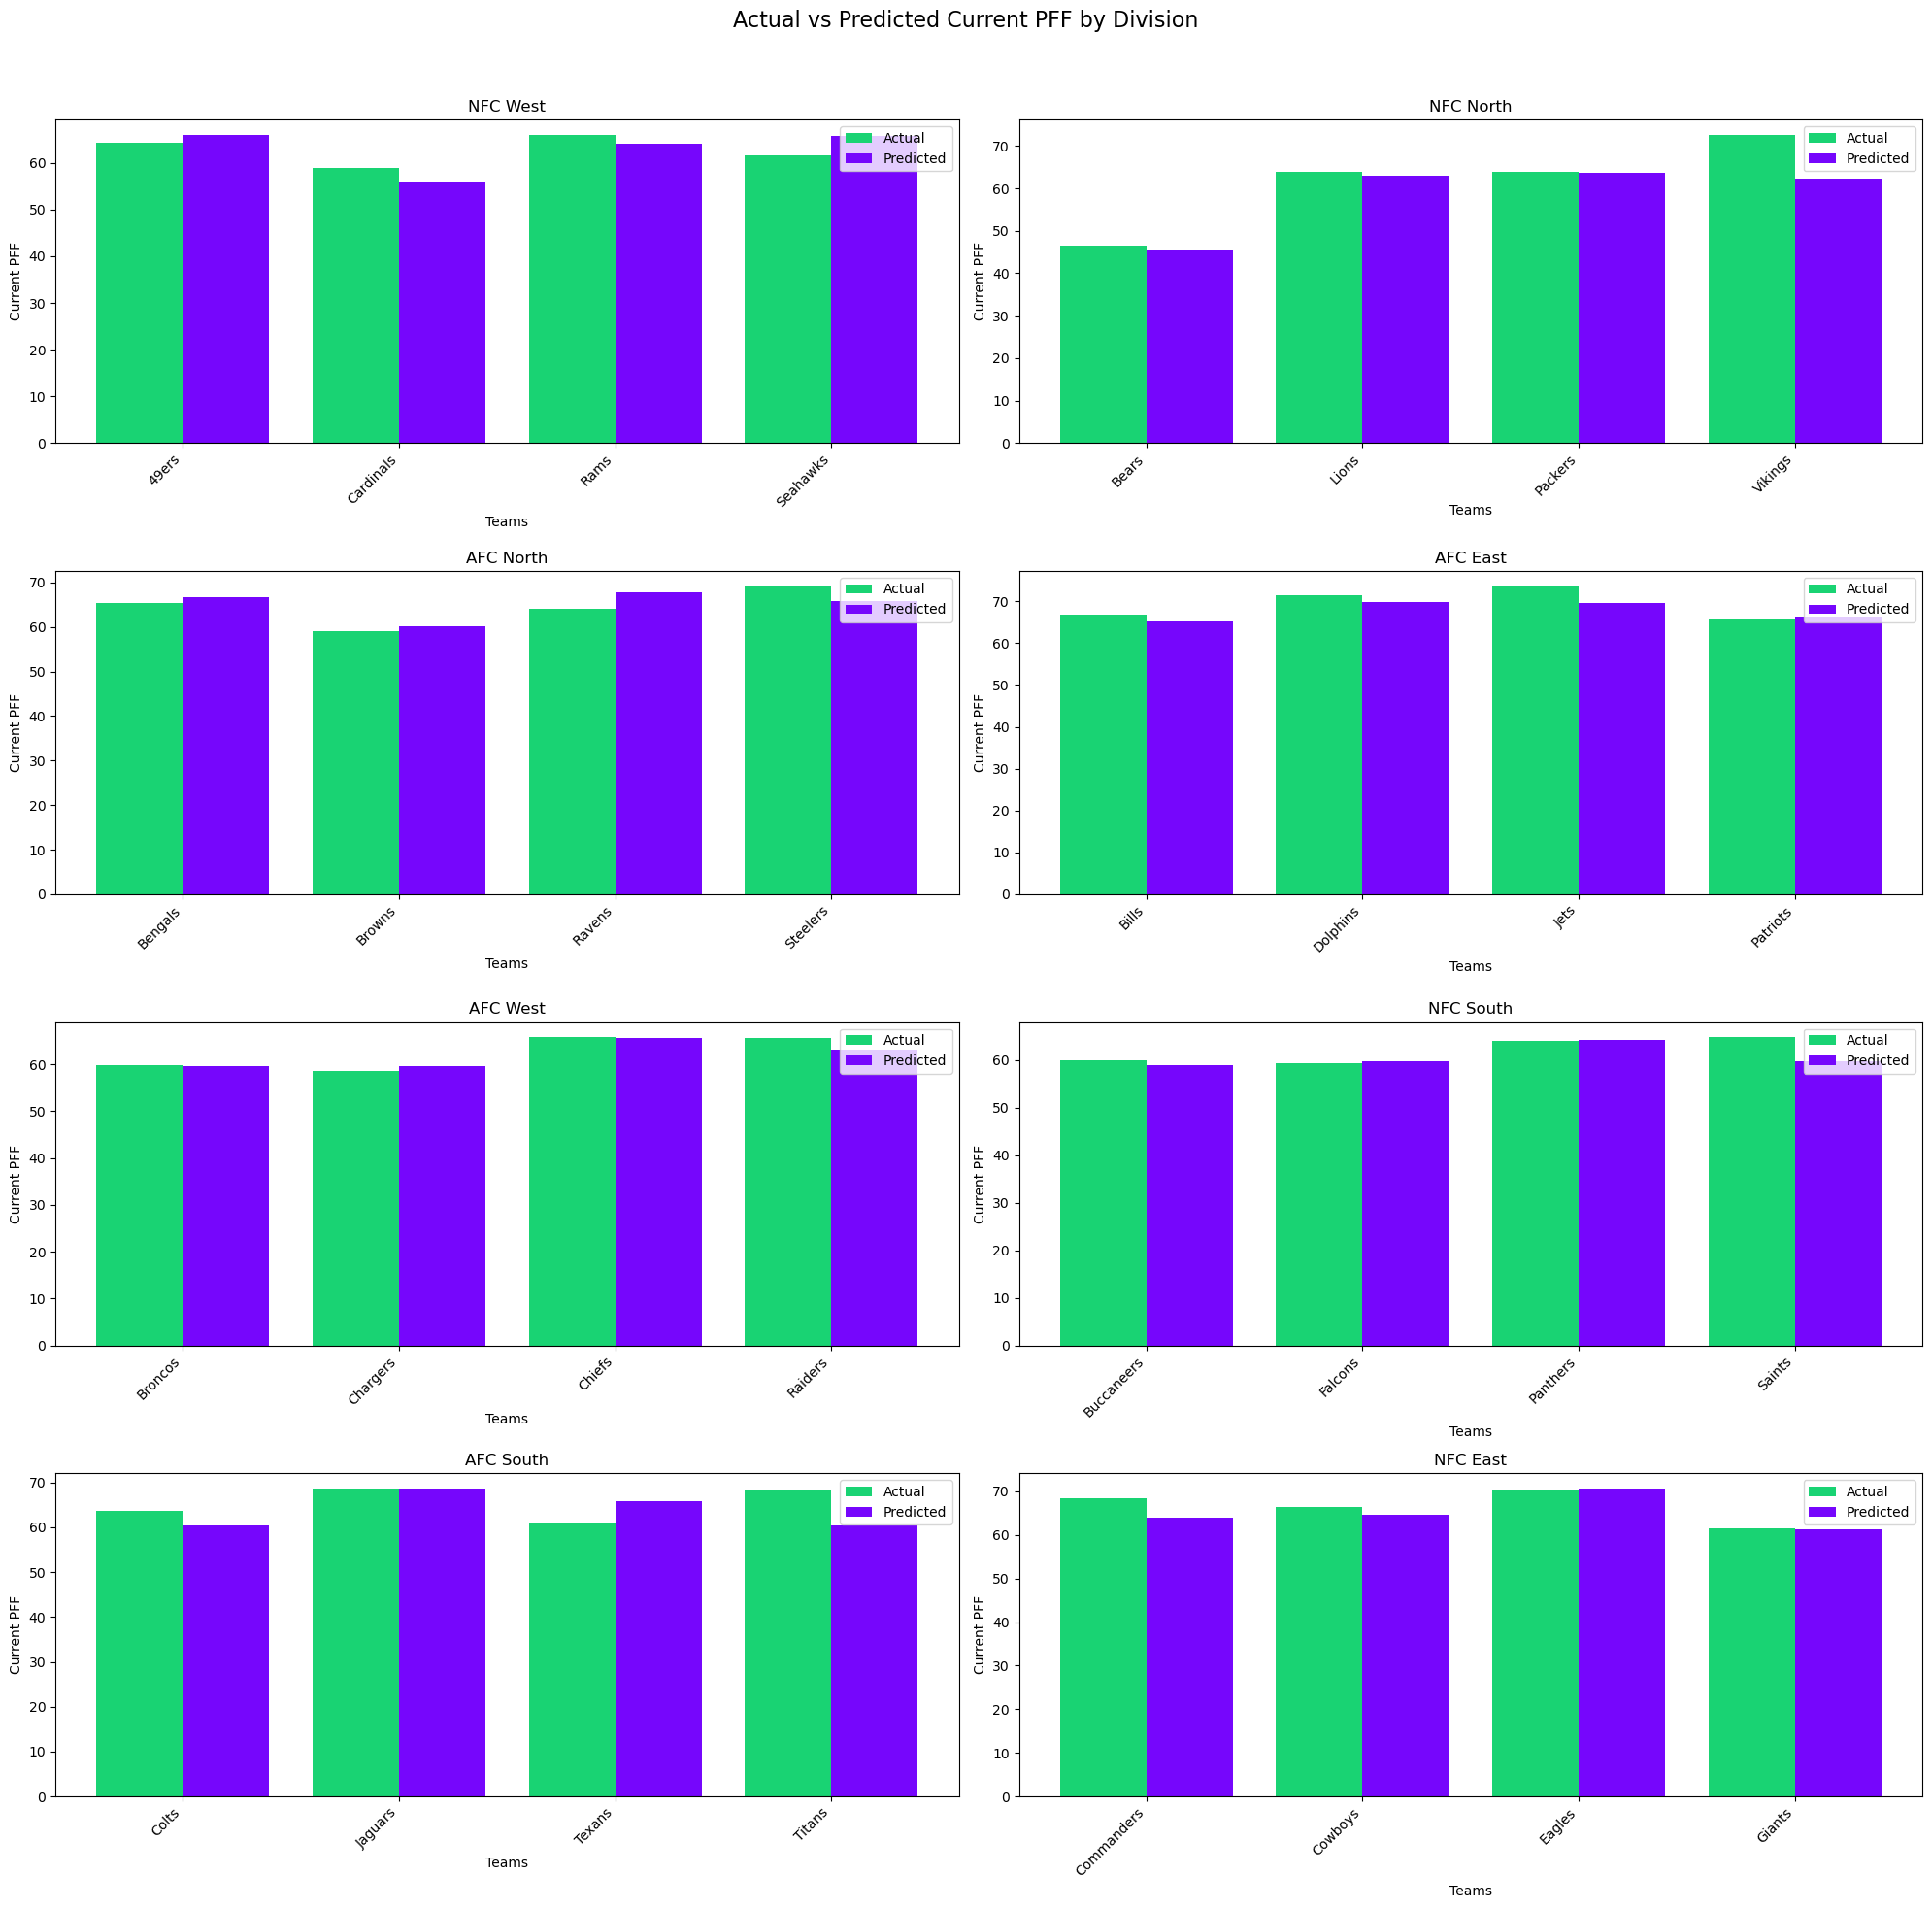

Epoch 1/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 44.0203 - val_loss: 34.1560
Epoch 2/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 50.1273 - val_loss: 34.4806
Epoch 3/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 26.7477 - val_loss: 39.5632
Epoch 4/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 57.9110 - val_loss: 50.4179
Epoch 5/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 40.4504 - val_loss: 41.7729
Epoch 6/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 59.0253 - val_loss: 35.1493
Epoch 7/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 55.3671 - val_loss: 34.0901
Epoch 8/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 45.7637 - val_loss: 34.8392
Epoch 9/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 47.6285 - val_loss: 32.0670
Epoch 10/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 50.4418 - val_loss: 37.1587
Epoch 11/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 94.2815 - val_loss: 54.7056
Epoch 12/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 41.99

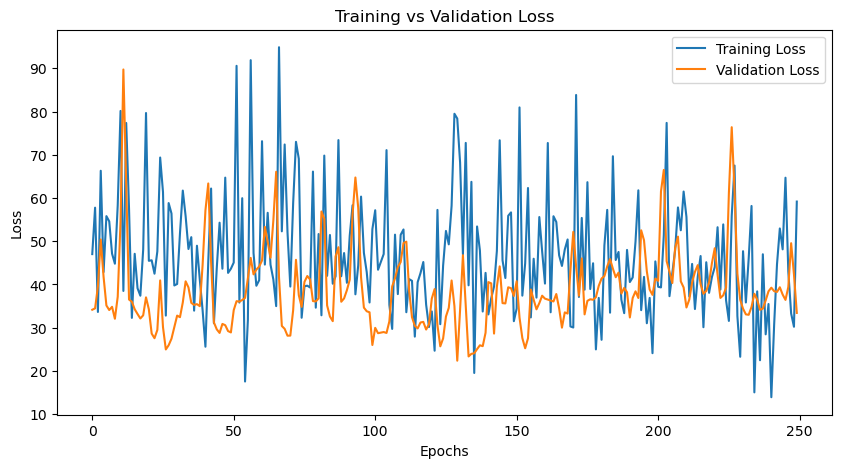

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R² Score: 0.5504


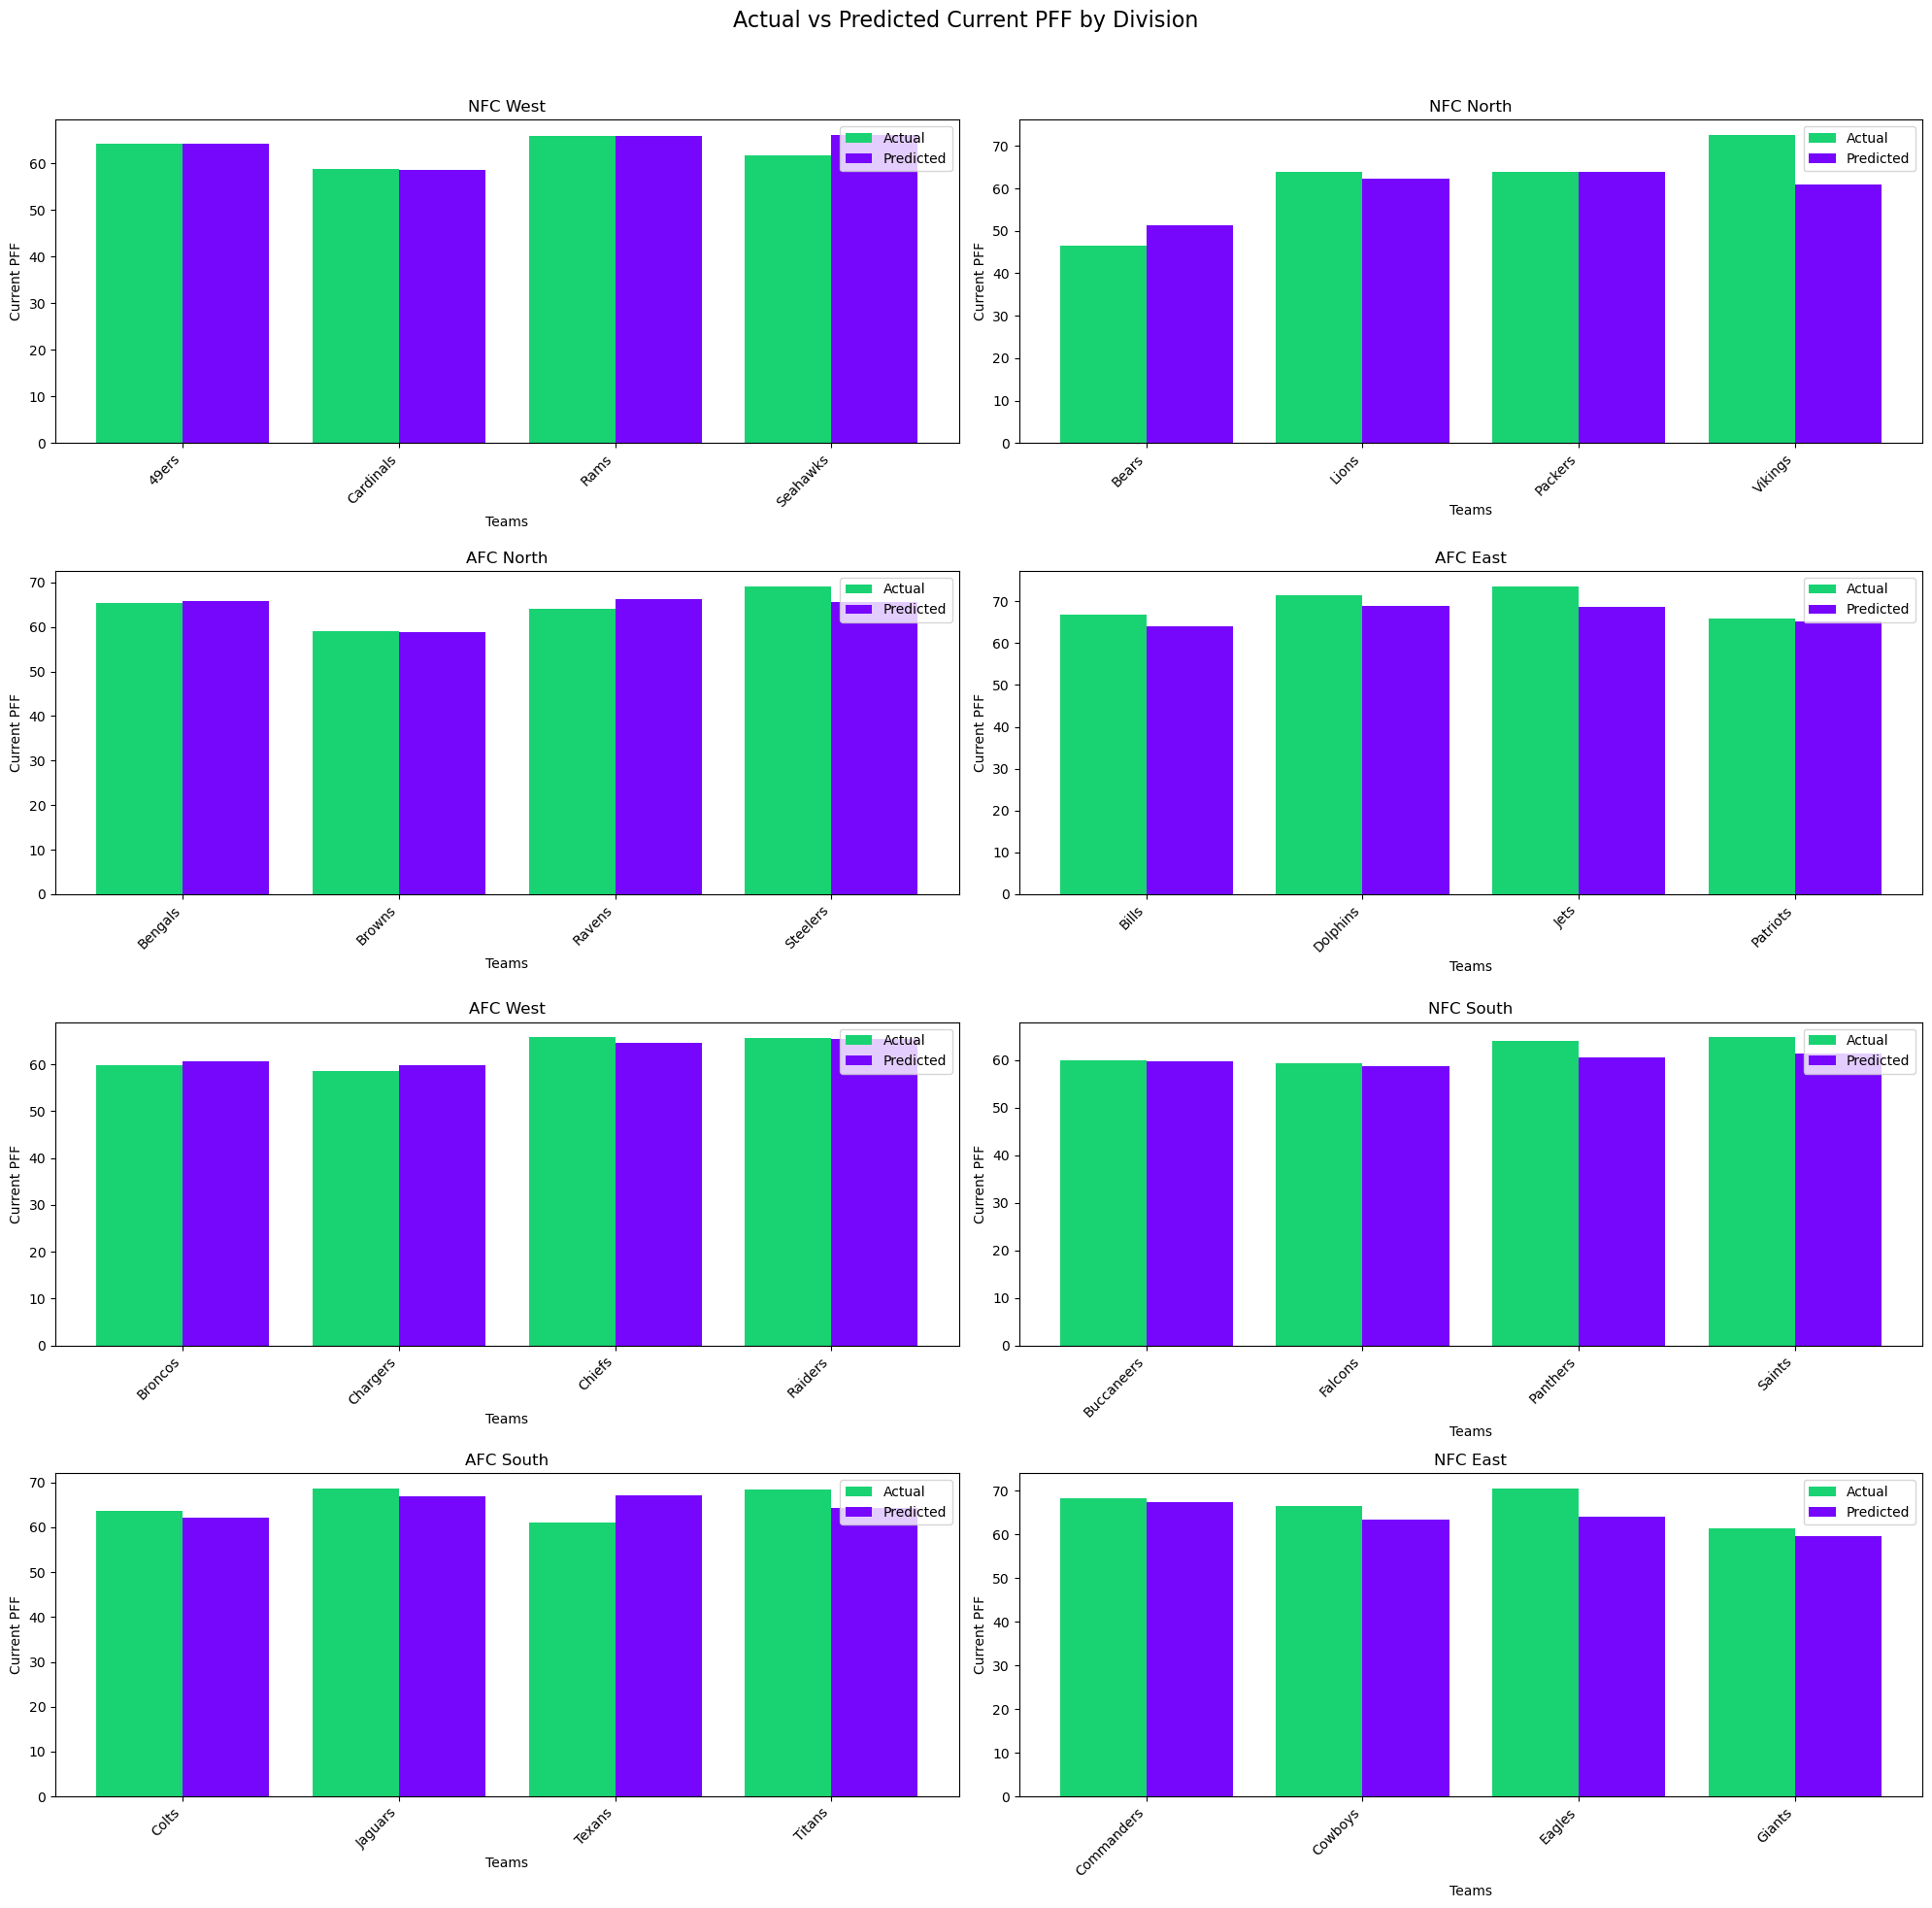

In [51]:
# Train the model
#history = model.fit(X, y, epochs=100, batch_size=8, validation_split=0.2, callbacks=[early_stopping])
epoch_list = [5, 10, 15, 20, 25, 30, 50, 100, 250]
for e in epoch_list:
    history = model.fit(X, y, epochs=e, batch_size=8, validation_split=0.2)
    # Plot training & validation loss
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training vs Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    # Make predictions on the test set
    y_pred = model.predict(X)
    from sklearn.metrics import r2_score

    # Calculate R² score
    r2 = r2_score(y, y_pred)

    # Print R² score
    print(f"R² Score: {r2:.4f}")
    # Plot actual vs predicted values
    data = dl_df[dl_df['Year'] == 2022].copy()
    data['Predicted_PFF'] = y_pred
    divisions = {
    "49ers": "NFC West", "Bears": "NFC North", "Bengals": "AFC North", "Bills": "AFC East",
    "Broncos": "AFC West", "Browns": "AFC North", "Buccaneers": "NFC South",
    "Cardinals": "NFC West", "Chargers": "AFC West", "Chiefs": "AFC West", "Colts": "AFC South",
    "Commanders": "NFC East", "Cowboys": "NFC East", "Dolphins": "AFC East", "Eagles": "NFC East",
    "Falcons": "NFC South", "Giants": "NFC East", "Jaguars": "AFC South", "Jets": "AFC East",
    "Lions": "NFC North", "Packers": "NFC North", "Panthers": "NFC South", "Patriots": "AFC East",
    "Raiders": "AFC West", "Rams": "NFC West", "Ravens": "AFC North", "Saints": "NFC South",
    "Seahawks": "NFC West", "Steelers": "AFC North", "Texans": "AFC South", "Titans": "AFC South",
    "Vikings": "NFC North"
}

    # Add the "Division" column
    data["Division"] = data["Team"].map(divisions)
    columns_to_keep = ['Current_PFF', 'Predicted_PFF', 'Team', 'Division']
    data = data.loc[:, columns_to_keep]
    
    divisions = data["Division"].unique()
    fig, axes = plt.subplots(4, 2, figsize=(20, 20))  # 4 rows, 2 columns

    for ax, division in zip(axes.flatten(), divisions):
        fig.suptitle('Actual vs Predicted Current PFF by Division', fontsize=16)
        division_data = data[data["Division"] == division]
        x = np.arange(4)  # Generate x-axis positions
        width = 0.4  # Bar width
        # Plot actual and predicted for this division
        ax.bar(x - width / 2, division_data['Current_PFF'], width, label='Actual', color='#19D373')  # Hex for Actual
        ax.bar(x + width / 2, division_data['Predicted_PFF'], width, label='Predicted', color='#7606FC')  # Hex for Predicted
        
        ax.set_xticks(x)
        ax.set_xticklabels(division_data['Team'], rotation=45, ha='right')
        ax.set_title(division)
        ax.set_xlabel('Teams')
        ax.set_ylabel('Current PFF')
        ax.legend()

    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
    plt.show()

In [ ]:
# Import necessary libraries
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, SimpleRNN, MultiHeadAttention, LayerNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Function to prepare data sequences for a given target metric
def prepare_sequences(dl_df, target_metric, sequence_length=3):
    sequences = []
    targets = []
    team_data = dl_df.groupby('Team')

    for team, group in team_data:
        # Ensure the team has enough data
        if len(group) >= sequence_length + 1:
            # Iterate through the data to create sequences
            for i in range(len(group) - sequence_length):
                # Select the relevant columns for the sequence
                sequence = group.iloc[i:i+sequence_length][[
                    'Previous_grades_tackle', 
                    'Previous_AV',
                    'Previous_PFF',
                    'Previous_franchise_id',
                    'Previous_grades_run_defense',
                    'Previous_grades_coverage_defense',
                    'Previous_tackles_for_loss'
                ]]
                
                # The target is the next year's target_metric
                target = group.iloc[i+sequence_length][target_metric]
                
                sequences.append(sequence.values)
                targets.append(target)
    
    # Convert lists to numpy arrays
    X = np.array(sequences)
    y = np.array(targets)
    
    print(f"Total sequences generated for {target_metric}: {len(sequences)}")
    print(f"X shape: {X.shape}, y shape: {y.shape}")
    
    # Reshape X to (samples, timesteps, features)
    X = X.reshape(X.shape[0], sequence_length, -1)
    
    # Scale the features
    scaler = StandardScaler()
    X = scaler.fit_transform(X.reshape(-1, X.shape[-1])).reshape(X.shape)
    
    return X, y, scaler


In [ ]:
# Function to build the model
def build_model(input_shape):
    inputs = Input(shape=input_shape)  # (timesteps, features)
    
    # Add a Dense layer before the attention to create more variability in the input
    dense_input = Dense(16, activation='relu')(inputs)
    
    # Add MultiHeadAttention layer
    attention_output = MultiHeadAttention(num_heads=2, key_dim=8)(dense_input, dense_input)
    
    # Add Layer Normalization for stability
    attention_output = LayerNormalization()(attention_output)
    
    # Add RNN layer to capture temporal dependencies
    rnn_output = SimpleRNN(units=50, activation='relu')(attention_output)
    
    # Add Dropout to prevent overfitting
    rnn_output = Dropout(0.2)(rnn_output)
    
    # Output layer for predicting the target metric
    output = Dense(1)(rnn_output)
    
    # Define the model
    model = Model(inputs=inputs, outputs=output)
    
    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    return model


In [ ]:
# Function to train and evaluate the model
def train_and_evaluate(X, y, target_metric, epochs_list, batch_size=8):
    input_shape = (X.shape[1], X.shape[2])  # (timesteps, features)
    model = build_model(input_shape)
    
    for e in epochs_list:
        print(f"\nTraining {target_metric} with {e} epochs...")
        history = model.fit(
            X, y, 
            epochs=e, 
            batch_size=batch_size, 
            validation_split=0.2, 
            verbose=1
        )
        
        # Plot training & validation loss
        plt.figure(figsize=(10, 5))
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f'Training vs Validation Loss for {target_metric} - {e} Epochs')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()
        
        # Make predictions on the entire dataset (you might want to separate into train/test)
        y_pred = model.predict(X)
        
        # Calculate R² score
        r2 = r2_score(y, y_pred)
        print(f"R² Score for {target_metric} after {e} epochs: {r2:.4f}")
        
        # Plot actual vs predicted values
        plt.figure(figsize=(10, 5))
        plt.scatter(range(len(y)), y, label='Actual', color='blue', alpha=0.5)
        plt.scatter(range(len(y_pred)), y_pred, label='Predicted', color='red', alpha=0.5)
        plt.title(f'Actual vs Predicted {target_metric} after {e} Epochs')
        plt.xlabel('Samples')
        plt.ylabel(target_metric)
        plt.legend()
        plt.show()

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


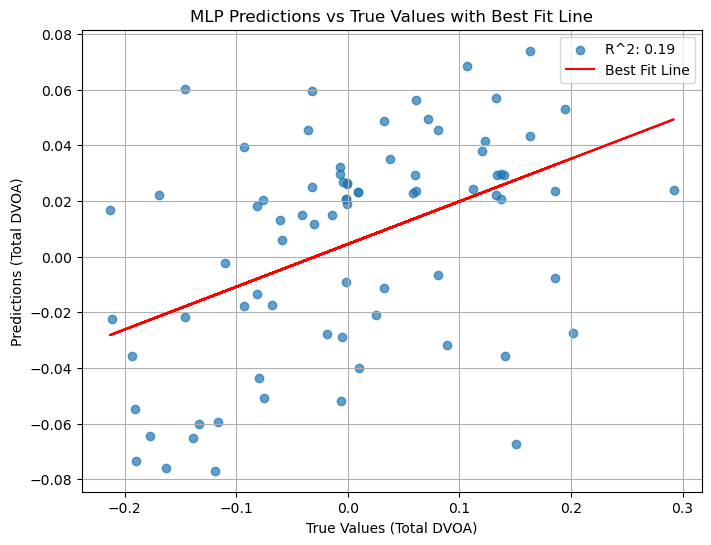

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Combined_Secondary_Defense.csv'  # Replace with the correct path to your file
data = pd.read_csv(file_path)

# Preprocessing
data['Total DVOA'] = data['Total DVOA'].str.rstrip('%').astype(float) / 100  # Convert percentages to decimals
data = data.dropna(subset=['Current_PFF', 'Net EPA'])  # Drop rows with missing values

# Add more features
X = data[['Current_PFF']].values  # Example features
y = data[['Net EPA']].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build an enhanced MLP model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dropout(0.3),  # Add dropout for regularization
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Single output for regression
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Lower learning rate
              loss='mean_squared_error',
              metrics=['mean_absolute_error'])

# Train the model with early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=16, 
                    validation_split=0.2, callbacks=[early_stopping], verbose=0)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Compute R^2 score
r2 = r2_score(y_test, y_pred)

# Scatter plot with predictions vs true values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, label=f'R^2: {r2:.2f}')

# Line of best fit
m, b = np.polyfit(y_test.flatten(), y_pred.flatten(), 1)  # Linear fit
plt.plot(y_test, m * y_test + b, color='red', label='Best Fit Line')

# Plot formatting
plt.xlabel('True Values (Total DVOA)')
plt.ylabel('Predictions (Total DVOA)')
plt.title('MLP Predictions vs True Values with Best Fit Line')
plt.legend()
plt.grid(True)
plt.show()



First few rows of the DataFrame:
      Team  Year Position  Value_cap_space  Value_draft_data  Current_AV  \
17   49ers  2019       DL        15.903294       1400.696696        53.0   
49   49ers  2019       LB        15.993624        146.484990        28.0   
81   49ers  2019       DB        15.313496        270.589442        35.0   
114  49ers  2020       DL         6.755802       1402.398565        39.0   
146  49ers  2020       LB         2.991927        144.514132        34.0   

     Current_PFF Total DVOA  win-loss-pct  Net EPA  ...  \
17     76.896506     27.90%        0.8125    0.216  ...   
49     63.131934     27.90%        0.8125    0.216  ...   
81     74.600742     27.90%        0.8125    0.216  ...   
114    60.632050      5.40%        0.3750    0.025  ...   
146    73.581955      5.40%        0.3750    0.025  ...   

     Previous_snap_counts_pass_rush  Previous_snap_counts_run_defense  \
17                       327.077444                        217.831236   
49       

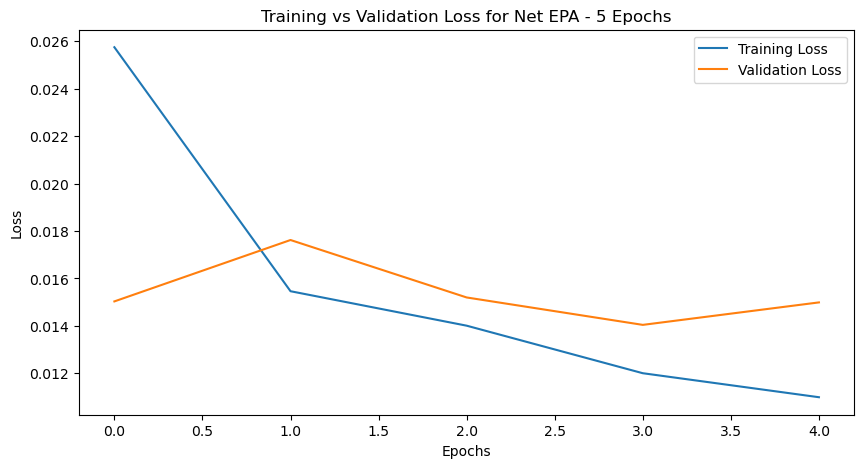

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/stepWARNING:tensorflow:5 out of the last 14 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x3035f4c20> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
R² Score for Net EPA after 5 epochs: 0.1298
MAE for Net EPA after 5 epochs: 0.0989
RMSE for Net EPA after 5 epochs: 0.1185


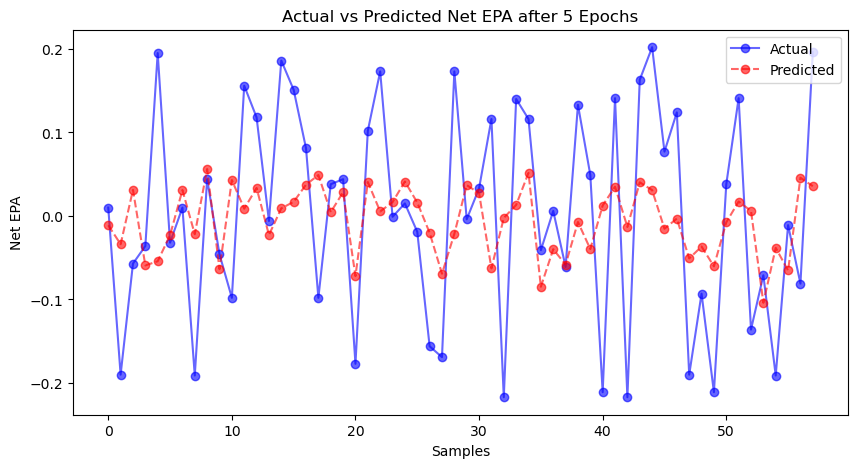


Training Net EPA with 10 epochs...
Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0125 - val_loss: 0.0147
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0104 - val_loss: 0.0135
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0098 - val_loss: 0.0141
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0090 - val_loss: 0.0133
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0087 - val_loss: 0.0143
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0087 - val_loss: 0.0136
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0091 - val_loss: 0.0134
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0090 - val_loss: 0.0133
Epoch 9/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0085 - val_loss: 0.0136
Epoch 10/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0072 - val_loss: 0.0130


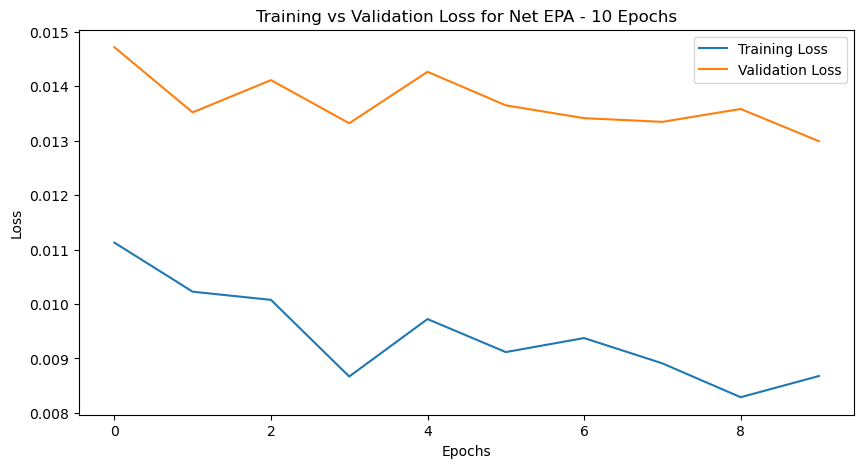

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
R² Score for Net EPA after 10 epochs: 0.1952
MAE for Net EPA after 10 epochs: 0.0972
RMSE for Net EPA after 10 epochs: 0.1140


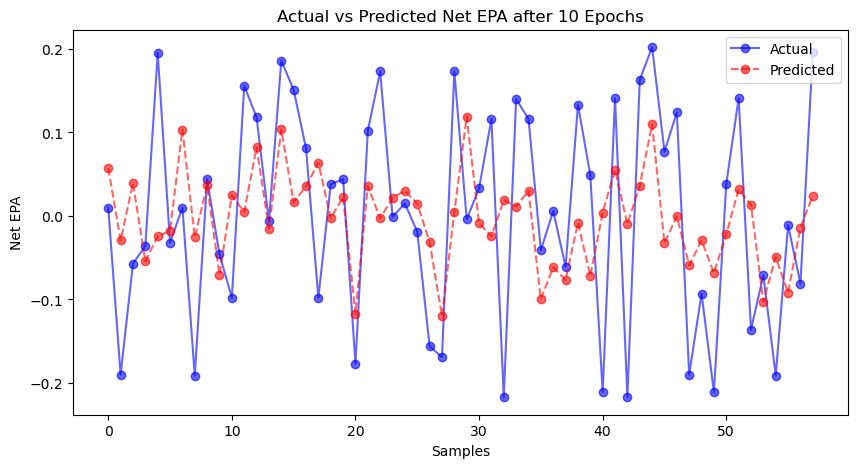


Training Net EPA with 15 epochs...
Epoch 1/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0084 - val_loss: 0.0127
Epoch 2/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0066 - val_loss: 0.0128
Epoch 3/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0088 - val_loss: 0.0124
Epoch 4/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0064 - val_loss: 0.0125
Epoch 5/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0074 - val_loss: 0.0118
Epoch 6/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0058 - val_loss: 0.0119
Epoch 7/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0075 - val_loss: 0.0112
Epoch 8/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0065 - val_loss: 0.0114
Epoch 9/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0066 - val_loss: 0.0117
Epoch 10/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0064 - val_loss: 0.0104
Epoch 11/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0060 - val_loss: 0.0108
Epoch 12/15
29/29 ━━━━━━━━━━━━━━━━━━━━

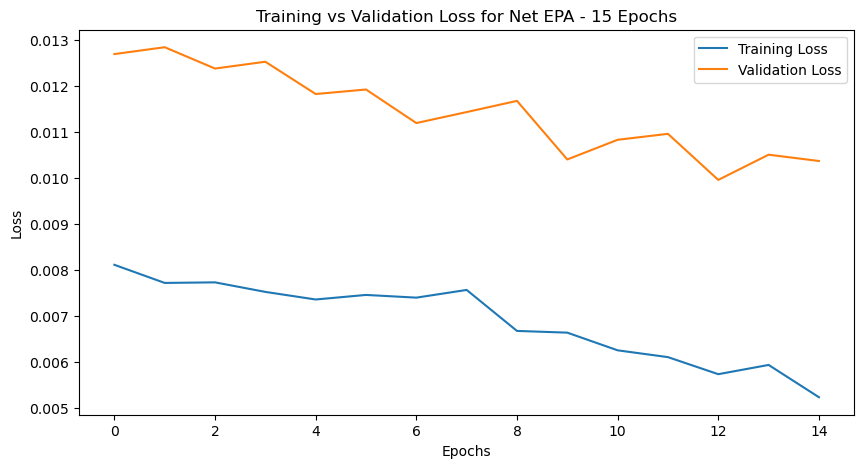

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 929us/step
R² Score for Net EPA after 15 epochs: 0.3833
MAE for Net EPA after 15 epochs: 0.0846
RMSE for Net EPA after 15 epochs: 0.0998


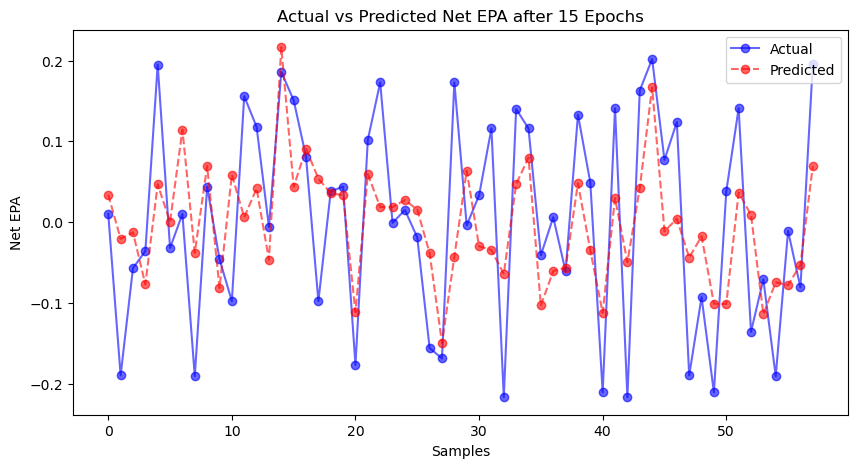


Training Net EPA with 20 epochs...
Epoch 1/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0055 - val_loss: 0.0102
Epoch 2/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0059 - val_loss: 0.0108
Epoch 3/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0061 - val_loss: 0.0105
Epoch 4/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0054 - val_loss: 0.0098
Epoch 5/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0051 - val_loss: 0.0104
Epoch 6/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0054 - val_loss: 0.0101
Epoch 7/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0046 - val_loss: 0.0094
Epoch 8/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0049 - val_loss: 0.0102
Epoch 9/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0048 - val_loss: 0.0099
Epoch 10/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0049 - val_loss: 0.0095
Epoch 11/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0047 - val_loss: 0.0096
Epoch 12/20
29/29 ━━━━━━━━━━━━━━━━━━━━

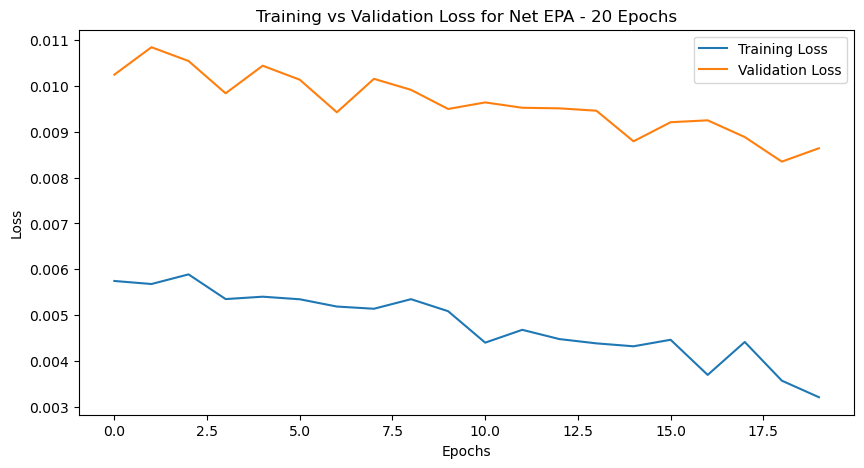

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
R² Score for Net EPA after 20 epochs: 0.4827
MAE for Net EPA after 20 epochs: 0.0743
RMSE for Net EPA after 20 epochs: 0.0914


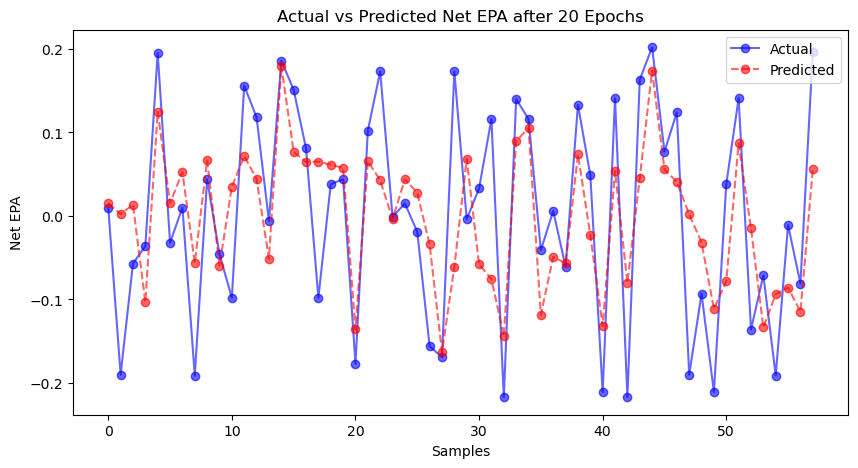


Training Net EPA with 25 epochs...
Epoch 1/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0035 - val_loss: 0.0089
Epoch 2/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0038 - val_loss: 0.0087
Epoch 3/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0031 - val_loss: 0.0086
Epoch 4/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0032 - val_loss: 0.0086
Epoch 5/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0035 - val_loss: 0.0087
Epoch 6/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0039 - val_loss: 0.0085
Epoch 7/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0030 - val_loss: 0.0084
Epoch 8/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0030 - val_loss: 0.0088
Epoch 9/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0033 - val_loss: 0.0087
Epoch 10/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0036 - val_loss: 0.0087
Epoch 11/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0037 - val_loss: 0.0084
Epoch 12/25
29/29 ━━━━━━━━━━━━━━━━━━━━

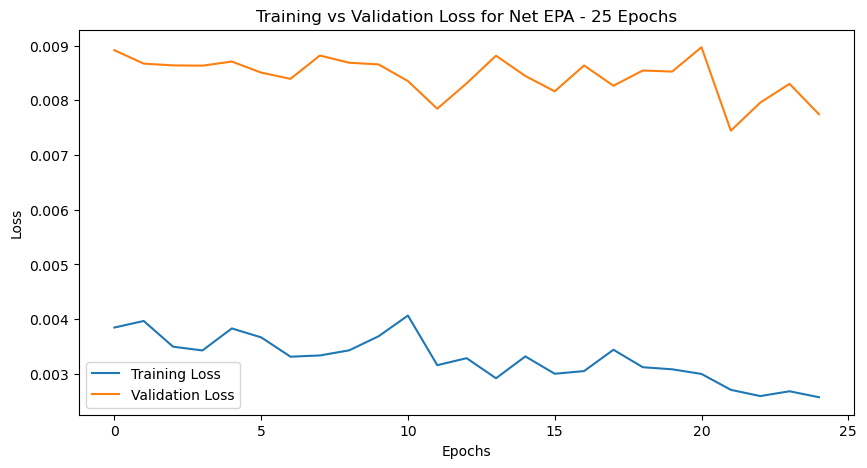

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
R² Score for Net EPA after 25 epochs: 0.5386
MAE for Net EPA after 25 epochs: 0.0693
RMSE for Net EPA after 25 epochs: 0.0863


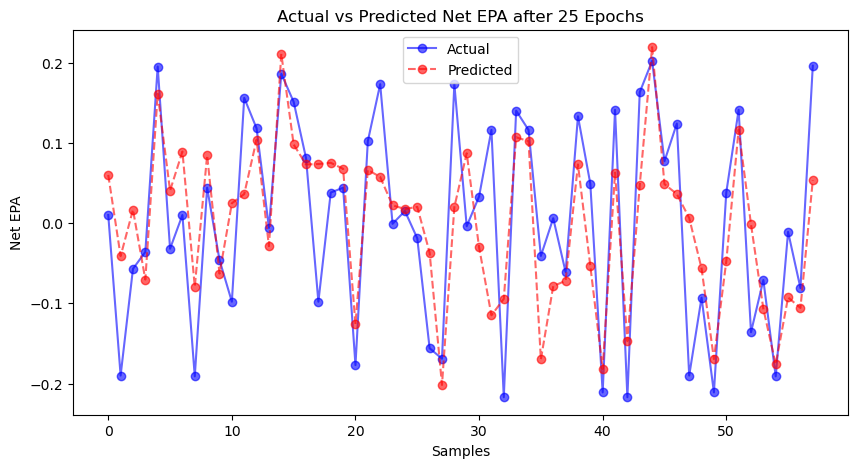


Training Net EPA with 30 epochs...
Epoch 1/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0028 - val_loss: 0.0082
Epoch 2/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0026 - val_loss: 0.0081
Epoch 3/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0029 - val_loss: 0.0088
Epoch 4/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0030 - val_loss: 0.0083
Epoch 5/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0024 - val_loss: 0.0083
Epoch 6/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0027 - val_loss: 0.0079
Epoch 7/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0025 - val_loss: 0.0079
Epoch 8/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0021 - val_loss: 0.0082
Epoch 9/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0022 - val_loss: 0.0076
Epoch 10/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0022 - val_loss: 0.0085
Epoch 11/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0025 - val_loss: 0.0081
Epoch 12/30
29/29 ━━━━━━━━━━━━━━━━━━━━

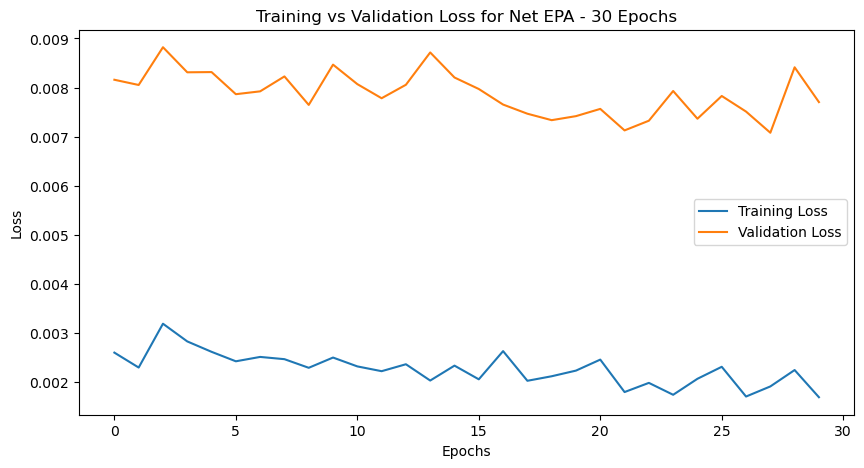

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
R² Score for Net EPA after 30 epochs: 0.5613
MAE for Net EPA after 30 epochs: 0.0659
RMSE for Net EPA after 30 epochs: 0.0841


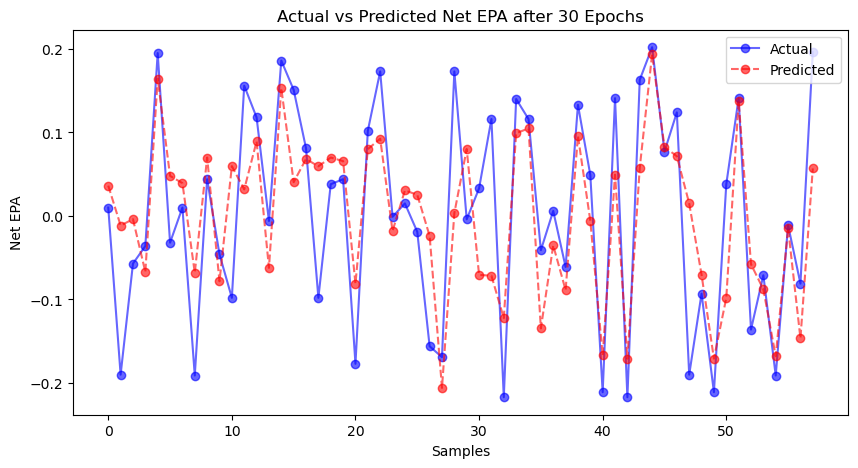


Training Net EPA with 50 epochs...
Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0018 - val_loss: 0.0074
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0016 - val_loss: 0.0073
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0016 - val_loss: 0.0074
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0019 - val_loss: 0.0071
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0016 - val_loss: 0.0079
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0015 - val_loss: 0.0071
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0016 - val_loss: 0.0076
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0017 - val_loss: 0.0071
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0017 - val_loss: 0.0069
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0012 - val_loss: 0.0081
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0023 - val_loss: 0.0079
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━

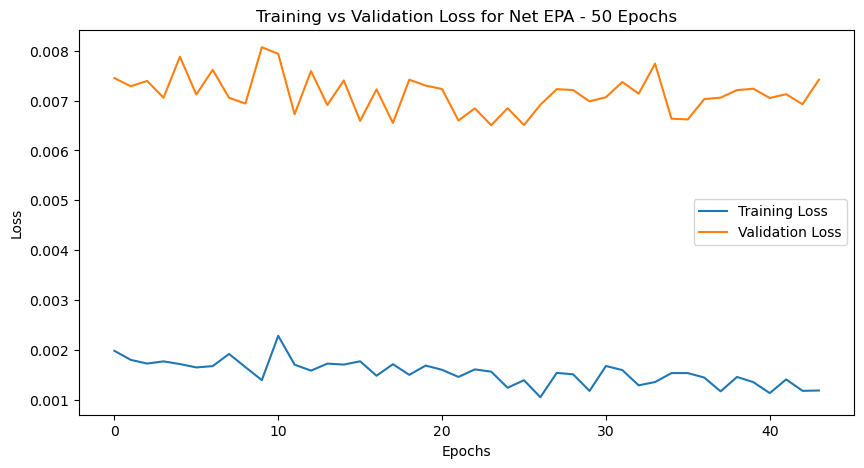

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step
R² Score for Net EPA after 50 epochs: 0.5969
MAE for Net EPA after 50 epochs: 0.0644
RMSE for Net EPA after 50 epochs: 0.0807


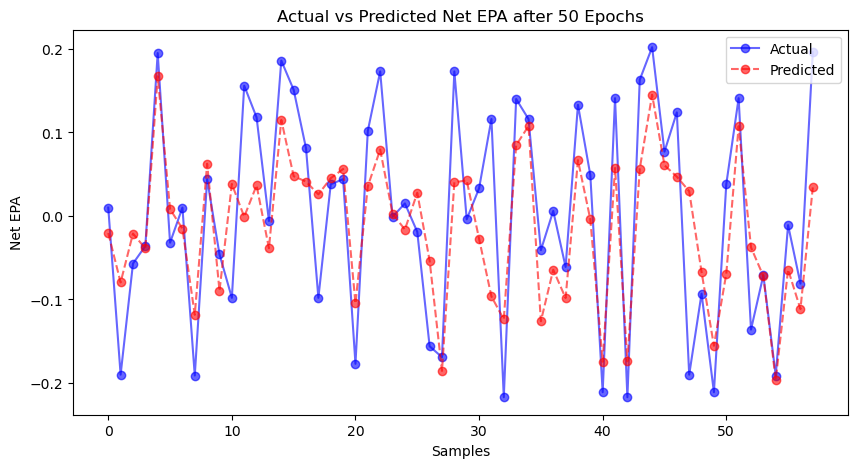


Training Net EPA with 100 epochs...
Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0019 - val_loss: 0.0066
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0011 - val_loss: 0.0069
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0014 - val_loss: 0.0067
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0013 - val_loss: 0.0078
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0016 - val_loss: 0.0067
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0017 - val_loss: 0.0074
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0014 - val_loss: 0.0067
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0017 - val_loss: 0.0069
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0020 - val_loss: 0.0068
Epoch 10/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0017 - val_loss: 0.0064
Epoch 11/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0011 - val_loss: 0.0072
Epoch 12/100
29/29 ━━━━━━━

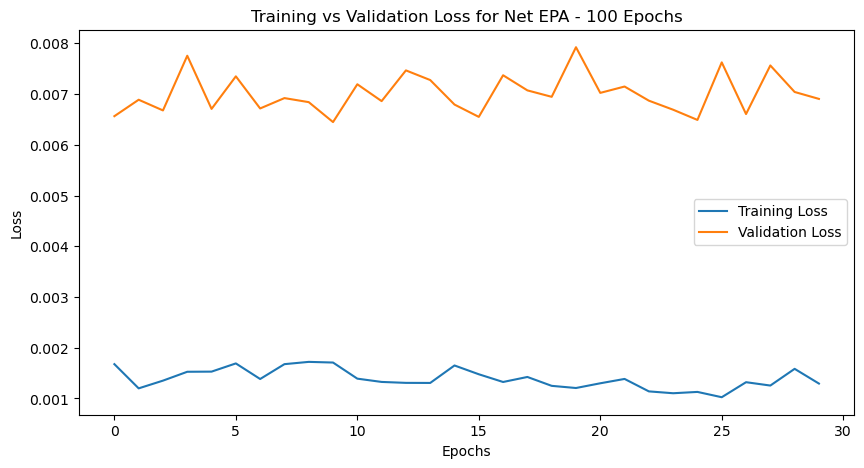

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
R² Score for Net EPA after 100 epochs: 0.6004
MAE for Net EPA after 100 epochs: 0.0606
RMSE for Net EPA after 100 epochs: 0.0803


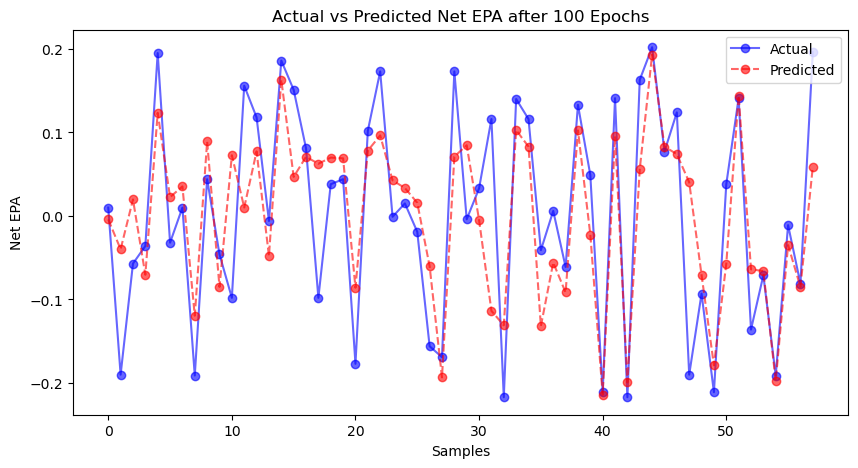


Training Net EPA with 250 epochs...
Epoch 1/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0011 - val_loss: 0.0067
Epoch 2/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0012 - val_loss: 0.0075
Epoch 3/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0013 - val_loss: 0.0076
Epoch 4/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0013 - val_loss: 0.0076
Epoch 5/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0010 - val_loss: 0.0072
Epoch 6/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0012 - val_loss: 0.0067
Epoch 7/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0010 - val_loss: 0.0072
Epoch 8/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0013 - val_loss: 0.0070
Epoch 9/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0014 - val_loss: 0.0078
Epoch 10/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0019 - val_loss: 0.0070
Epoch 11/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0013 - val_loss: 0.0071
Epoch 12/250
29/29 ━━━━━━━

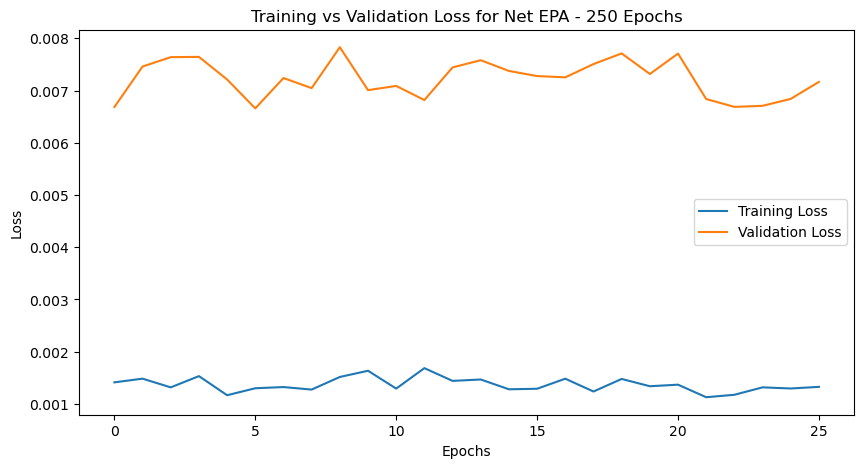

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
R² Score for Net EPA after 250 epochs: 0.5874
MAE for Net EPA after 250 epochs: 0.0610
RMSE for Net EPA after 250 epochs: 0.0816


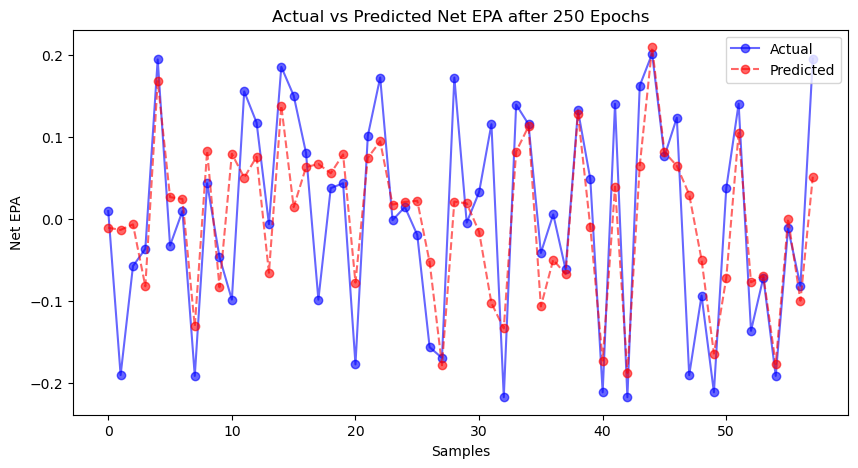


Preparing data for target metric: Total DVOA
Total sequences generated for Total DVOA: 288
X shape: (288, 3, 7), y shape: (288,)

Data Types in X_train: float64
Data Types in X_test: float64
Data Types in y_train: float64
Data Types in y_test: float64

Training Total DVOA with 5 epochs...
Epoch 1/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1426 - val_loss: 0.0392
Epoch 2/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0359 - val_loss: 0.0354
Epoch 3/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0279 - val_loss: 0.0343
Epoch 4/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0267 - val_loss: 0.0348
Epoch 5/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0238 - val_loss: 0.0341


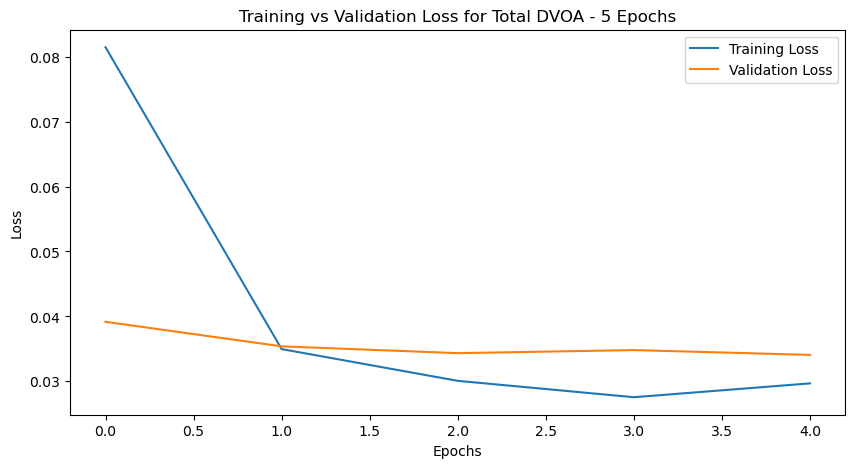

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
R² Score for Total DVOA after 5 epochs: 0.0731
MAE for Total DVOA after 5 epochs: 0.1569
RMSE for Total DVOA after 5 epochs: 0.1846


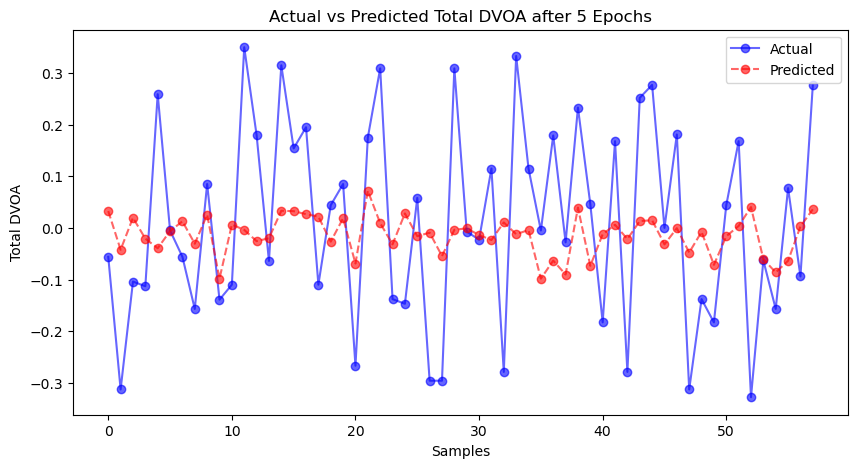


Training Total DVOA with 10 epochs...
Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0261 - val_loss: 0.0335
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0273 - val_loss: 0.0326
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0219 - val_loss: 0.0351
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0228 - val_loss: 0.0326
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0227 - val_loss: 0.0333
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0237 - val_loss: 0.0328
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0212 - val_loss: 0.0315
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0199 - val_loss: 0.0326
Epoch 9/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0207 - val_loss: 0.0325
Epoch 10/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0206 - val_loss: 0.0327


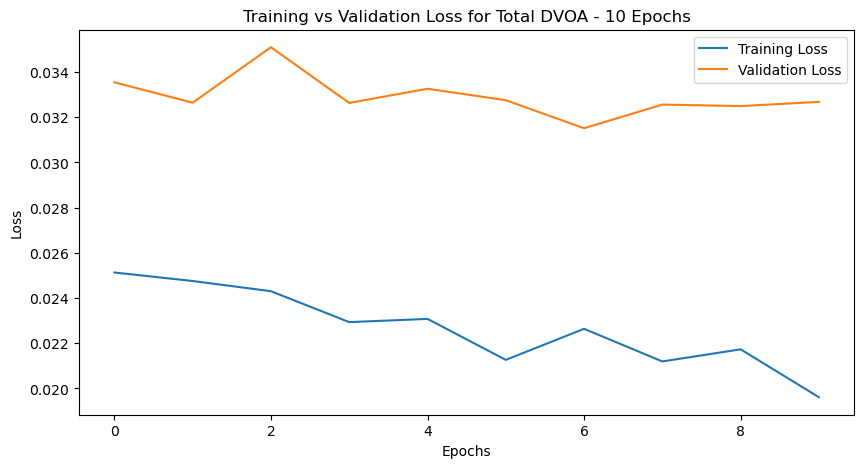

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step
R² Score for Total DVOA after 10 epochs: 0.1428
MAE for Total DVOA after 10 epochs: 0.1506
RMSE for Total DVOA after 10 epochs: 0.1775


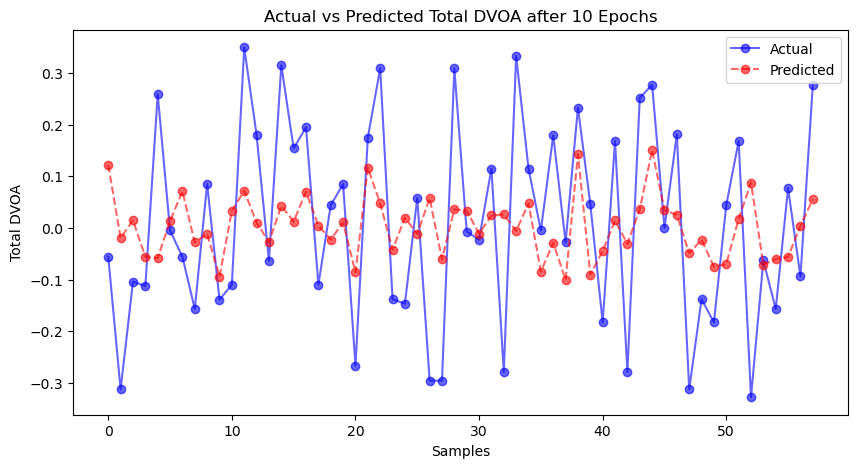


Training Total DVOA with 15 epochs...
Epoch 1/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0204 - val_loss: 0.0337
Epoch 2/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0234 - val_loss: 0.0317
Epoch 3/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0193 - val_loss: 0.0315
Epoch 4/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0168 - val_loss: 0.0320
Epoch 5/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0183 - val_loss: 0.0305
Epoch 6/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0205 - val_loss: 0.0296
Epoch 7/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0200 - val_loss: 0.0305
Epoch 8/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0184 - val_loss: 0.0293
Epoch 9/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0142 - val_loss: 0.0285
Epoch 10/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0159 - val_loss: 0.0286
Epoch 11/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0193 - val_loss: 0.0302
Epoch 12/15
29/29 ━━━━━━━━━━━━━━━━━

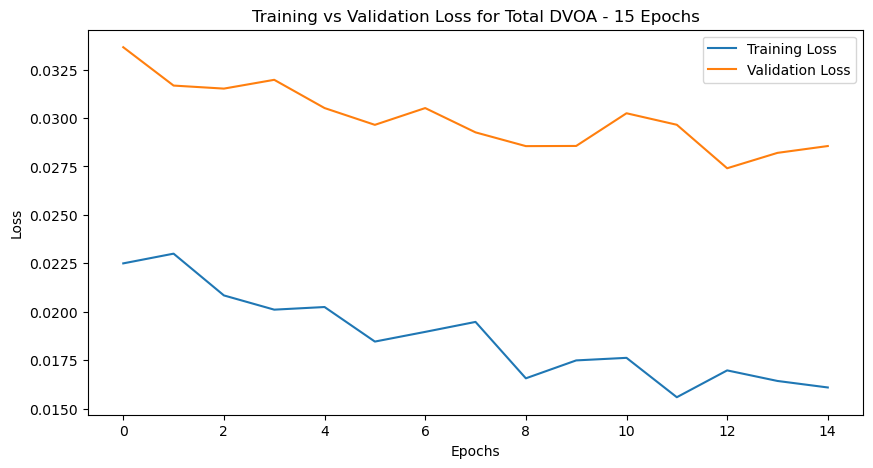

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step
R² Score for Total DVOA after 15 epochs: 0.2544
MAE for Total DVOA after 15 epochs: 0.1415
RMSE for Total DVOA after 15 epochs: 0.1656


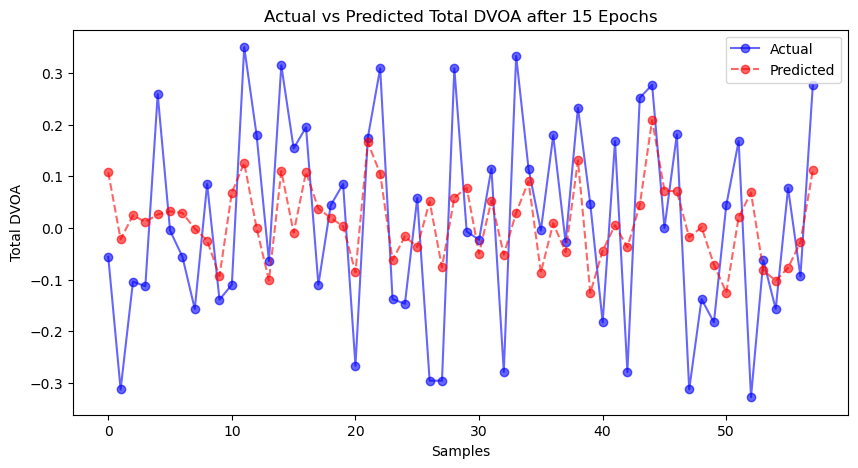


Training Total DVOA with 20 epochs...
Epoch 1/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0168 - val_loss: 0.0268
Epoch 2/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0151 - val_loss: 0.0273
Epoch 3/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0185 - val_loss: 0.0284
Epoch 4/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0156 - val_loss: 0.0271
Epoch 5/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0140 - val_loss: 0.0285
Epoch 6/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0127 - val_loss: 0.0279
Epoch 7/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0119 - val_loss: 0.0254
Epoch 8/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0150 - val_loss: 0.0265
Epoch 9/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0145 - val_loss: 0.0257
Epoch 10/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0144 - val_loss: 0.0272
Epoch 11/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0117 - val_loss: 0.0258
Epoch 12/20
29/29 ━━━━━━━━━━━━━━━━━

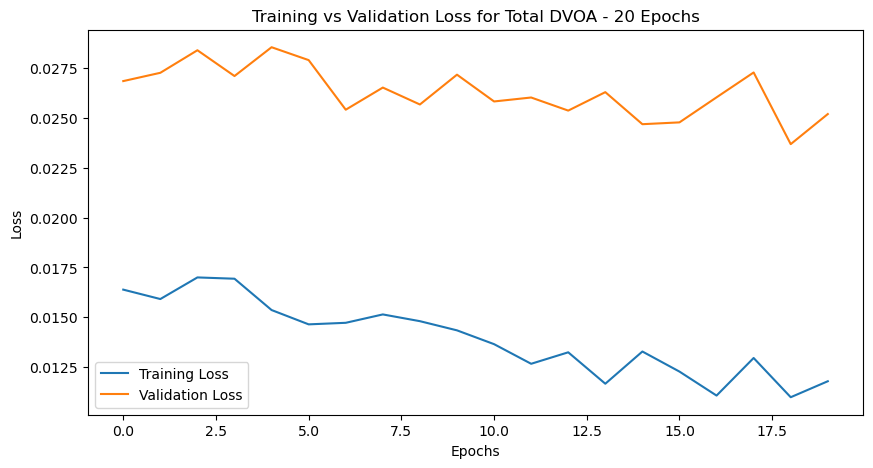

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
R² Score for Total DVOA after 20 epochs: 0.3558
MAE for Total DVOA after 20 epochs: 0.1237
RMSE for Total DVOA after 20 epochs: 0.1539


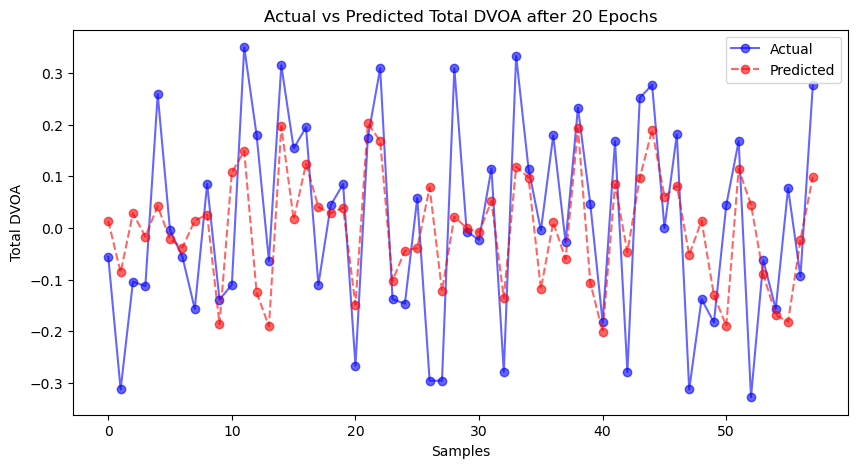


Training Total DVOA with 25 epochs...
Epoch 1/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0109 - val_loss: 0.0228
Epoch 2/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0098 - val_loss: 0.0241
Epoch 3/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0102 - val_loss: 0.0253
Epoch 4/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0100 - val_loss: 0.0239
Epoch 5/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0108 - val_loss: 0.0243
Epoch 6/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0097 - val_loss: 0.0245
Epoch 7/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0101 - val_loss: 0.0238
Epoch 8/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0096 - val_loss: 0.0227
Epoch 9/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0084 - val_loss: 0.0242
Epoch 10/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0094 - val_loss: 0.0248
Epoch 11/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0077 - val_loss: 0.0229
Epoch 12/25
29/29 ━━━━━━━━━━━━━━━━━

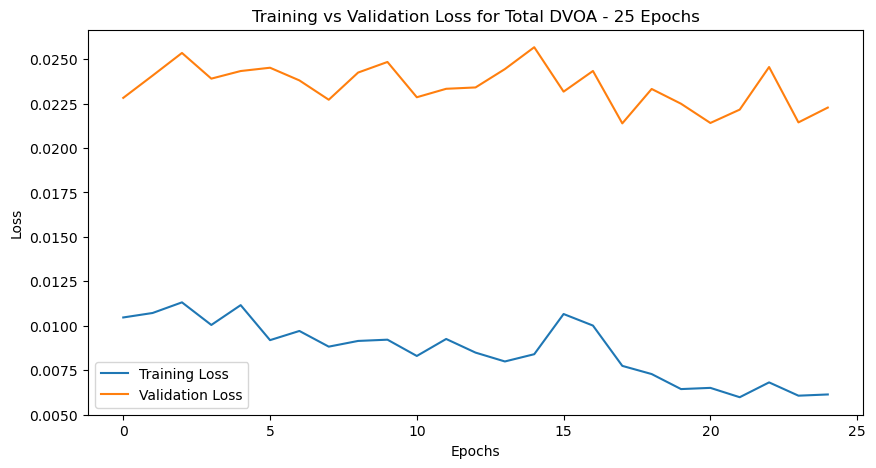

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step
R² Score for Total DVOA after 25 epochs: 0.4183
MAE for Total DVOA after 25 epochs: 0.1139
RMSE for Total DVOA after 25 epochs: 0.1462


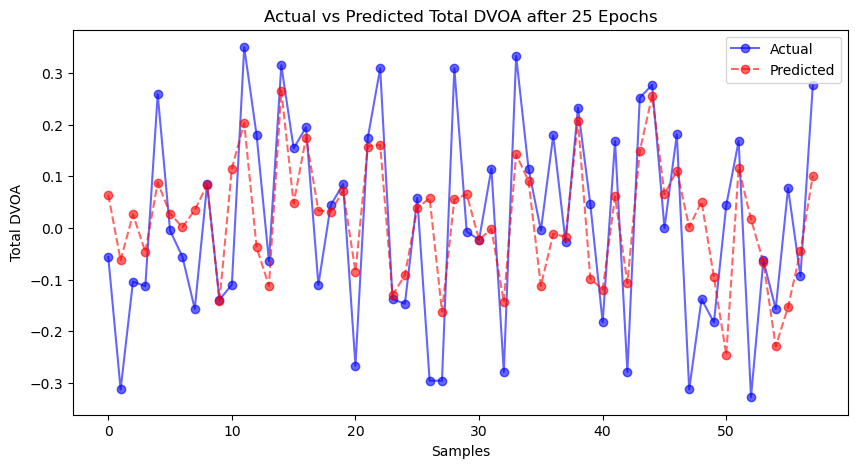


Training Total DVOA with 30 epochs...
Epoch 1/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0069 - val_loss: 0.0219
Epoch 2/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0086 - val_loss: 0.0211
Epoch 3/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0083 - val_loss: 0.0247
Epoch 4/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0067 - val_loss: 0.0217
Epoch 5/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0065 - val_loss: 0.0217
Epoch 6/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0066 - val_loss: 0.0221
Epoch 7/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0054 - val_loss: 0.0209
Epoch 8/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0066 - val_loss: 0.0225
Epoch 9/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0053 - val_loss: 0.0216
Epoch 10/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0066 - val_loss: 0.0232
Epoch 11/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0059 - val_loss: 0.0206
Epoch 12/30
29/29 ━━━━━━━━━━━━━━━━━

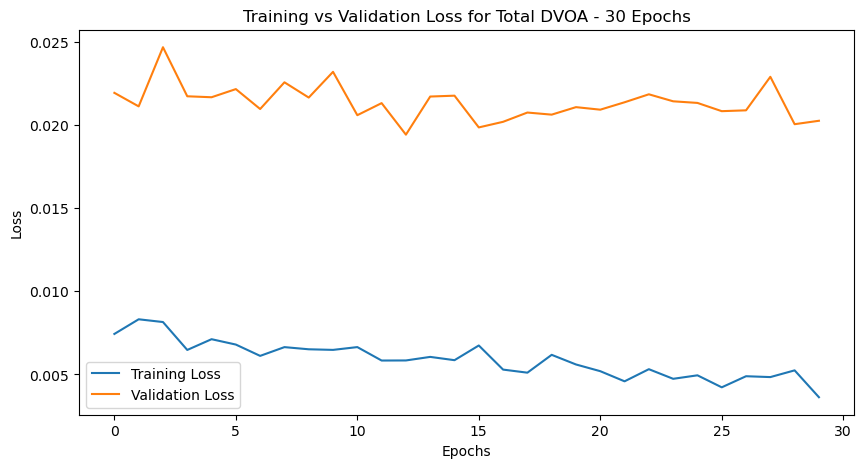

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step
R² Score for Total DVOA after 30 epochs: 0.4721
MAE for Total DVOA after 30 epochs: 0.1082
RMSE for Total DVOA after 30 epochs: 0.1393


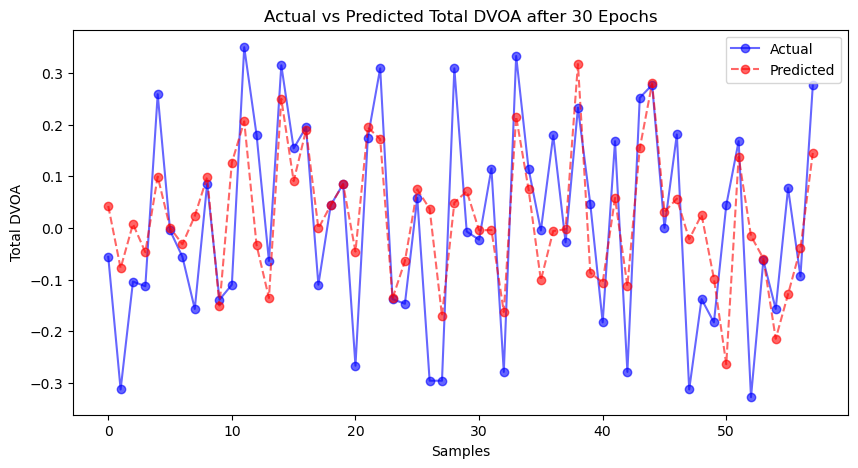


Training Total DVOA with 50 epochs...
Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0057 - val_loss: 0.0199
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0058 - val_loss: 0.0199
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0055 - val_loss: 0.0205
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0061 - val_loss: 0.0247
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0078 - val_loss: 0.0222
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0056 - val_loss: 0.0220
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0056 - val_loss: 0.0214
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0053 - val_loss: 0.0208
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0049 - val_loss: 0.0201
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0050 - val_loss: 0.0213
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0055 - val_loss: 0.0222
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━

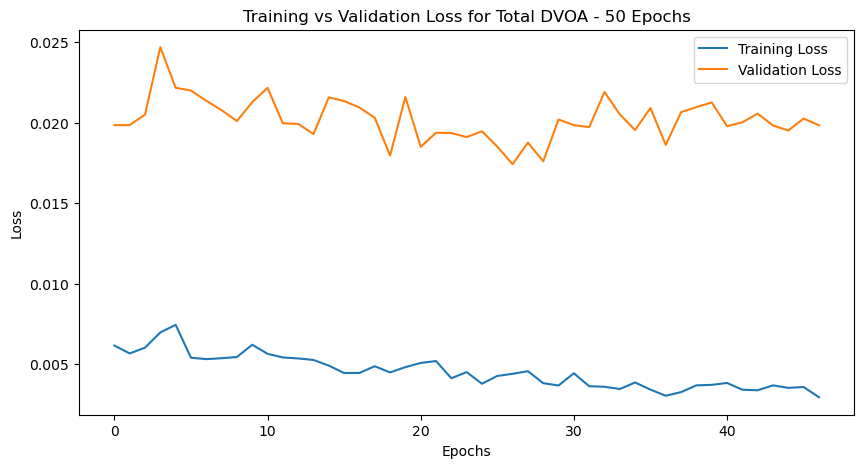

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
R² Score for Total DVOA after 50 epochs: 0.5260
MAE for Total DVOA after 50 epochs: 0.1030
RMSE for Total DVOA after 50 epochs: 0.1320


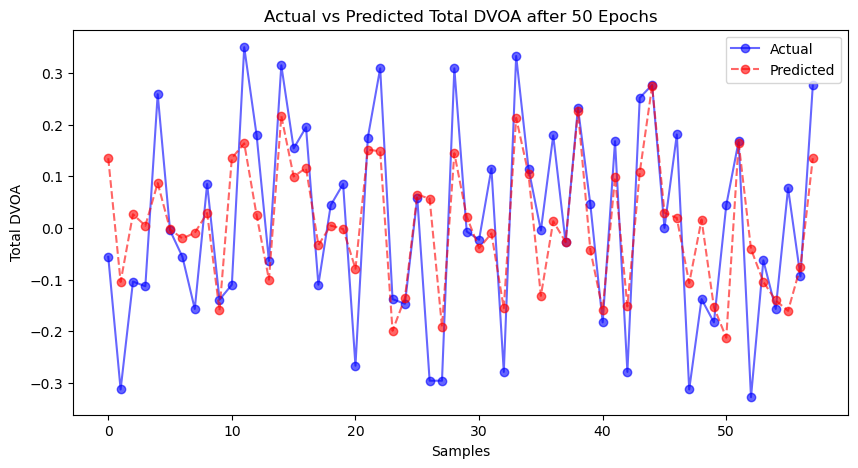


Training Total DVOA with 100 epochs...
Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0036 - val_loss: 0.0191
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0044 - val_loss: 0.0187
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0034 - val_loss: 0.0192
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0030 - val_loss: 0.0192
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0022 - val_loss: 0.0181
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0044 - val_loss: 0.0194
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0030 - val_loss: 0.0210
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0033 - val_loss: 0.0194
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0038 - val_loss: 0.0190
Epoch 10/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0036 - val_loss: 0.0187
Epoch 11/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0043 - val_loss: 0.0202
Epoch 12/100
29/29 ━━━━

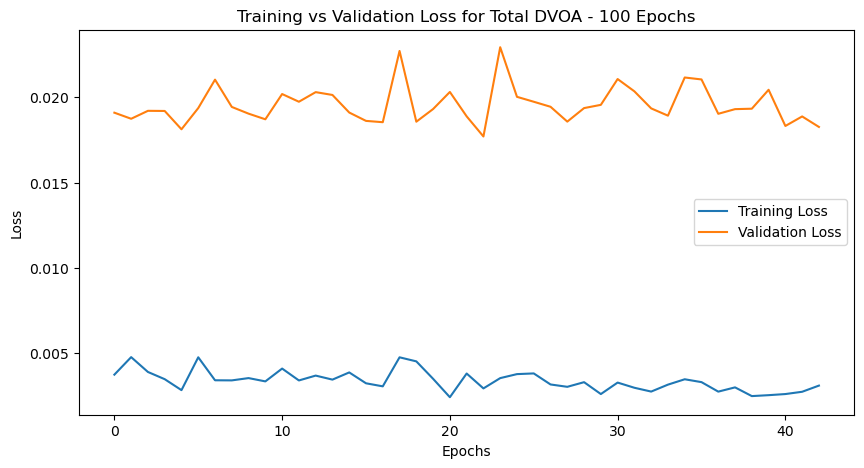

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 891us/step
R² Score for Total DVOA after 100 epochs: 0.5185
MAE for Total DVOA after 100 epochs: 0.1056
RMSE for Total DVOA after 100 epochs: 0.1330


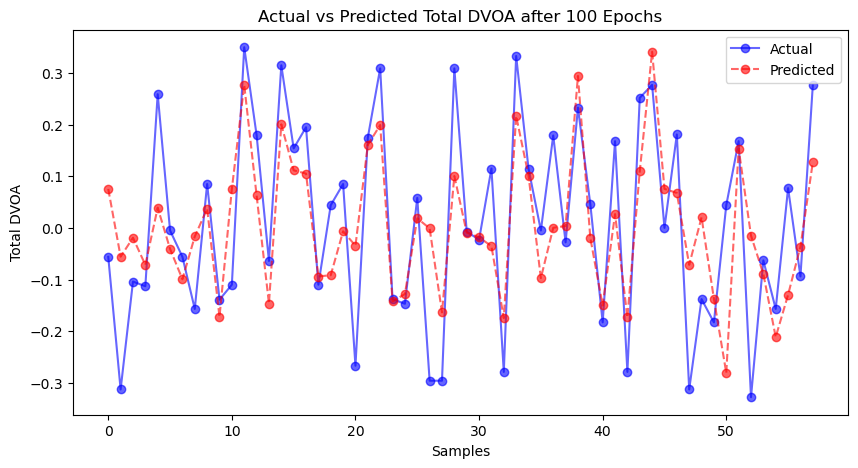


Training Total DVOA with 250 epochs...
Epoch 1/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0028 - val_loss: 0.0171
Epoch 2/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0022 - val_loss: 0.0194
Epoch 3/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0027 - val_loss: 0.0189
Epoch 4/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0030 - val_loss: 0.0188
Epoch 5/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0035 - val_loss: 0.0192
Epoch 6/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0032 - val_loss: 0.0181
Epoch 7/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0038 - val_loss: 0.0169
Epoch 8/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0033 - val_loss: 0.0192
Epoch 9/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0036 - val_loss: 0.0200
Epoch 10/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0023 - val_loss: 0.0206
Epoch 11/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0026 - val_loss: 0.0204
Epoch 12/250
29/29 ━━━━

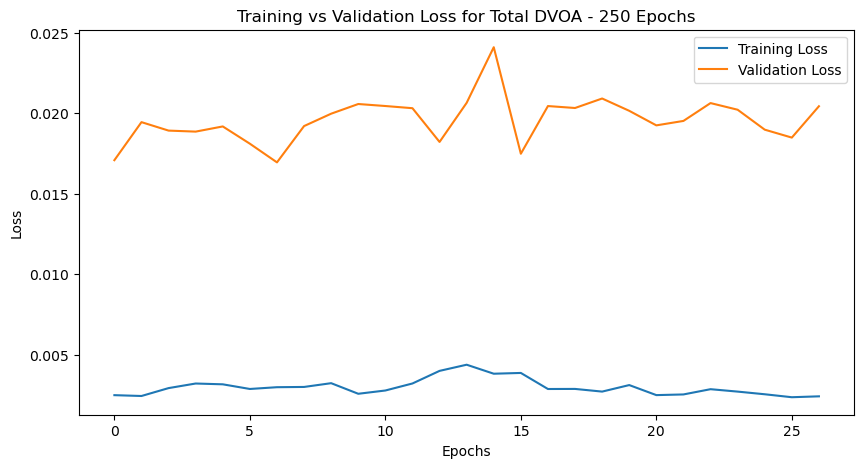

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
R² Score for Total DVOA after 250 epochs: 0.5392
MAE for Total DVOA after 250 epochs: 0.1037
RMSE for Total DVOA after 250 epochs: 0.1302


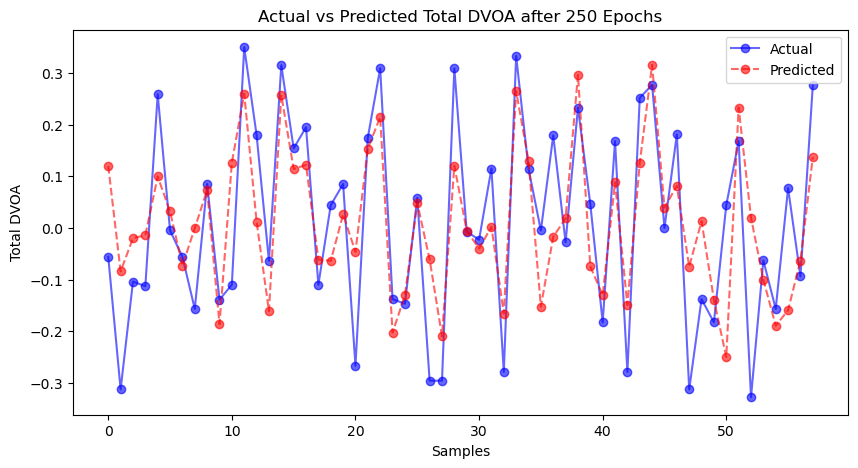

In [ ]:
# Import necessary libraries
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LSTM, MultiHeadAttention, LayerNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.impute import SimpleImputer

# Function to clean percentage columns
def clean_percentage_column(dl_df, column):
    # Remove '%' and convert to float, then divide by 100 if it's a percentage
    dl_df[column] = dl_df[column].str.replace('%', '').astype(float) / 100.0
    return dl_df

# Function to prepare data sequences for a given target metric
def prepare_sequences(dl_df, target_metric, feature_cols, sequence_length=3, test_size=0.2):
    sequences = []
    targets = []
    team_data = dl_df.groupby('Team')

    for team, group in team_data:
        # Ensure the team has enough data
        if len(group) >= sequence_length + 1:
            # Iterate through the data to create sequences
            for i in range(len(group) - sequence_length):
                # Select the relevant columns for the sequence
                sequence = group.iloc[i:i+sequence_length][feature_cols]
                
                # The target is the next year's target_metric
                target = group.iloc[i+sequence_length][target_metric]
                
                sequences.append(sequence.values)
                targets.append(target)

    # Convert lists to numpy arrays
    X = np.array(sequences)
    y = np.array(targets)

    print(f"Total sequences generated for {target_metric}: {len(sequences)}")
    print(f"X shape: {X.shape}, y shape: {y.shape}")

    # Reshape X to (samples, timesteps, features)
    X = X.reshape(X.shape[0], sequence_length, -1)

    # Scale the features
    scaler = StandardScaler()
    X = scaler.fit_transform(X.reshape(-1, X.shape[-1])).reshape(X.shape)

    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    return X_train, X_test, y_train, y_test, scaler

# Function to build the model
def build_model(input_shape):
    inputs = Input(shape=input_shape)  # (timesteps, features)
    
    # Add a Dense layer before the attention to create more variability in the input
    dense_input = Dense(16, activation='relu')(inputs)
    
    # Add MultiHeadAttention layer
    attention_output = MultiHeadAttention(num_heads=2, key_dim=8)(dense_input, dense_input)
    
    # Add Layer Normalization for stability
    attention_output = LayerNormalization()(attention_output)
    
    # Add LSTM layer to capture temporal dependencies
    lstm_output = LSTM(units=50, activation='relu')(attention_output)
    
    # Add Dropout to prevent overfitting
    lstm_output = Dropout(0.2)(lstm_output)
    
    # Output layer for predicting the target metric
    output = Dense(1)(lstm_output)
    
    # Define the model
    model = Model(inputs=inputs, outputs=output)
    
    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    return model

# Function to train and evaluate the model
def train_and_evaluate(X_train, X_test, y_train, y_test, target_metric, epochs_list, batch_size=8):
    input_shape = (X_train.shape[1], X_train.shape[2])  # (timesteps, features)
    model = build_model(input_shape)
    
    # Debugging: Check data types
    print("\nData Types in X_train:", X_train.dtype)
    print("Data Types in X_test:", X_test.dtype)
    print("Data Types in y_train:", y_train.dtype)
    print("Data Types in y_test:", y_test.dtype)
    
    # Check for any non-numeric data
    if not np.issubdtype(X_train.dtype, np.number):
        raise ValueError("X_train contains non-numeric data.")
    if not np.issubdtype(X_test.dtype, np.number):
        raise ValueError("X_test contains non-numeric data.")
    if not np.issubdtype(y_train.dtype, np.number):
        raise ValueError("y_train contains non-numeric data.")
    if not np.issubdtype(y_test.dtype, np.number):
        raise ValueError("y_test contains non-numeric data.")
    
    for e in epochs_list:
        print(f"\nTraining {target_metric} with {e} epochs...")
        early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
        history = model.fit(
            X_train, y_train, 
            epochs=e, 
            batch_size=batch_size, 
            validation_data=(X_test, y_test), 
            callbacks=[early_stopping],
            verbose=1
        )
        
        # Plot training & validation loss
        plt.figure(figsize=(10, 5))
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f'Training vs Validation Loss for {target_metric} - {e} Epochs')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()
        
        # Make predictions on the test set
        y_pred = model.predict(X_test)
        
        # Calculate evaluation metrics
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        print(f"R² Score for {target_metric} after {e} epochs: {r2:.4f}")
        print(f"MAE for {target_metric} after {e} epochs: {mae:.4f}")
        print(f"RMSE for {target_metric} after {e} epochs: {rmse:.4f}")
        
        # Plot actual vs predicted values with lines
        plt.figure(figsize=(10, 5))
        plt.plot(range(len(y_test)), y_test, label='Actual', color='blue', linestyle='-', marker='o', alpha=0.6)
        plt.plot(range(len(y_pred)), y_pred, label='Predicted', color='red', linestyle='--', marker='o', alpha=0.6)
        plt.title(f'Actual vs Predicted {target_metric} after {e} Epochs')
        plt.xlabel('Samples')
        plt.ylabel(target_metric)
        plt.legend()
        plt.show()


# Main Execution
if __name__ == "__main__":
    # Load the data
    dl_df = pd.read_csv('Combined_Secondary_Defense.csv')
    
    # Define the intended target metrics with correct column names
    intended_target_metrics = ['Net EPA', 'Total DVOA']  # Corrected target metrics
    
    # Drop unnecessary columns
    columns_to_drop = ['Unnamed: 0']
    dl_df = dl_df.drop(columns=columns_to_drop, errors='ignore')  # Use errors='ignore' to avoid issues if the column doesn't exist
    
    # Sort data by Team and Year
    dl_df = dl_df.sort_values(by=['Team', 'Year'])
    print("First few rows of the DataFrame:")
    print(dl_df.head())
    
    # Get the actual columns present
    actual_columns = dl_df.columns.tolist()
    
    # Filter target metrics to include only existing columns
    target_metrics = [metric for metric in intended_target_metrics if metric in actual_columns]
    
    # Notify the user about missing columns
    missing_metrics = [metric for metric in intended_target_metrics if metric not in actual_columns]
    if missing_metrics:
        print(f"Warning: The following target metrics are missing in the DataFrame and will be skipped: {missing_metrics}")
    
    # Encode 'Previous_franchise_id' if it exists
    if 'Previous_franchise_id' in actual_columns:
        print("Encoding 'Previous_franchise_id'...")
        label_encoder = LabelEncoder()
        dl_df['Previous_franchise_id_encoded'] = label_encoder.fit_transform(dl_df['Previous_franchise_id'])
        print("Encoding completed.")
    else:
        print("Warning: 'Previous_franchise_id' column is missing from the DataFrame.")
    
    # Update actual_columns after encoding
    actual_columns = dl_df.columns.tolist()
    
    # Define feature columns with encoded 'Previous_franchise_id'
    feature_columns = [
        'Previous_grades_tackle', 
        'Previous_AV',
        'Previous_PFF',
        'Previous_franchise_id_encoded',  # Use the encoded column
        'Previous_grades_run_defense',
        'Previous_grades_coverage_defense',
        'Previous_tackles_for_loss'
    ]
    
    # Check if all feature columns exist
    missing_features = [feature for feature in feature_columns if feature not in actual_columns]
    if missing_features:
        print(f"Error: The following feature columns are missing in the DataFrame: {missing_features}")
        raise ValueError("Missing feature columns. Please verify your DataFrame.")
    
    # Verify that all feature columns are numeric
    print("\nVerifying that all feature columns are numeric...")
    non_numeric_features = dl_df[feature_columns].select_dtypes(include=['object']).columns.tolist()
    if non_numeric_features:
        print(f"Error: The following feature columns contain non-numeric data: {non_numeric_features}")
        raise ValueError("Non-numeric data found in feature columns. Please encode or convert them to numeric types.")
    else:
        print("All feature columns are numeric.")
    
    # Check and handle non-numeric entries in feature columns
    print("\nChecking for non-numeric entries in feature columns...")
    for col in feature_columns:
        if dl_df[col].dtype == 'object':
            dl_df[col] = pd.to_numeric(dl_df[col], errors='coerce')
            print(f"Converted '{col}' to numeric. Non-convertible values are set to NaN.")
    
    # Check for NaN values in feature and target columns
    print("\nChecking for NaN values in feature and target columns...")
    nan_counts = dl_df[feature_columns + target_metrics].isnull().sum()
    print(nan_counts)
    
    # Handle NaN values in target metrics by cleaning percentage strings and converting to numeric
    for metric in target_metrics:
        if dl_df[metric].dtype == 'object':
            # Check if the column contains '%'
            if dl_df[metric].str.contains('%').any():
                print(f"\nCleaning percentage values in '{metric}'...")
                dl_df = clean_percentage_column(dl_df, metric)
                print(f"'{metric}' cleaned.")
            else:
                # Attempt to convert to numeric, coercing errors to NaN
                dl_df[metric] = pd.to_numeric(dl_df[metric], errors='coerce')
                print(f"Converted '{metric}' to numeric.")
    
    # Check for NaN values again after cleaning target metrics
    print("\nChecking for NaN values in target metrics after cleaning:")
    print(dl_df[target_metrics].isnull().sum())
    
    # Drop rows with NaN in target metrics
    dl_df_clean = dl_df.dropna(subset=target_metrics)
    print(f"\nNumber of rows after dropping NaN in target metrics: {dl_df_clean.shape[0]}")
    
    # Initialize the imputer with a strategy (e.g., mean)
    imputer = SimpleImputer(strategy='mean')
    
    # Fit and transform the feature columns
    dl_df_clean[feature_columns] = imputer.fit_transform(dl_df_clean[feature_columns])
    
    # Verify that there are no NaNs left in feature columns
    print("\nNumber of NaN values in feature columns after imputation:")
    print(dl_df_clean[feature_columns].isnull().sum())
    
    # Convert X_train, X_test, y_train, y_test to appropriate data types
    # This is already handled in the prepare_sequences function
    
    # Iterate over each valid target metric
    for metric in target_metrics:
        print(f"\nPreparing data for target metric: {metric}")
        X_train, X_test, y_train, y_test, scaler = prepare_sequences(dl_df_clean, metric, feature_columns)
        
        # Define the list of epochs you want to train for
        epoch_list = [5, 10, 15, 20, 25, 30, 50, 100, 250]
        
        # Train and evaluate the model
        train_and_evaluate(X_train, X_test, y_train, y_test, metric, epoch_list)
